In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
# The function is defined with default parameters so that if you call it with just your data, it will construct a DataFrame with t-1
# as X and t as y

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]

    df = pd.DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [ ]:
df = pd.read_csv('/content/Drexel_fatigue.csv')

In [ ]:
df

,hits,cycles,RUL,RUL_norm
0,163,0,568,1.000000
1,132,1,567,0.998239
2,109,2,566,0.996479
3,97,3,565,0.994718
4,97,4,564,0.992958
...,...,...,...,...
1811,406,622,4,0.006390
1812,385,623,3,0.004792
1813,286,624,2,0.003195
1814,682,625,1,0.001597


In [ ]:
df['time']

0       11.040707
1       11.929389
2       12.167480
3       13.389931
4       14.029659
          ...    
191    706.380507
192    706.381727
193    706.384575
194    706.386649
195    706.654760
Name: time, Length: 196, dtype: float64

In [ ]:
df['Time']=df['time']*10000000

In [ ]:
df1['Time']=df1['time']*10000000

In [ ]:
df2['Time']=df2['time']*10000000

In [ ]:
df['Time']

0      1.104071e+08
1      1.192939e+08
2      1.216748e+08
3      1.338993e+08
4      1.402966e+08
           ...     
191    7.063805e+09
192    7.063817e+09
193    7.063846e+09
194    7.063866e+09
195    7.066548e+09
Name: Time, Length: 196, dtype: float64

In [ ]:
max(df['Time'])

7066547595.999999

In [ ]:
df1['time']

0         16.566864
1         16.566914
2         16.693152
3         16.693341
4         16.838890
           ...     
4481    1521.274915
4482    1521.274940
4483    1529.717260
4484    1529.717314
4485    1539.973673
Name: time, Length: 4486, dtype: float64

In [ ]:
max(df1['Time'])

15399736733.999998

In [ ]:
df2['time']

0       43.995272
1       43.995570
2       44.744960
3       49.193080
4       49.193123
          ...    
154    873.086334
155    873.522885
156    873.592219
157    873.775126
158    873.779797
Name: time, Length: 159, dtype: float64

In [ ]:
df1 = pd.read_csv('/content/A3.csv')

In [ ]:
df1

,Unnamed: 0.1,Unnamed: 0,time,channel,param_id,amplitude,duration,energy,rms,threshold,...,cascade_counts,cascade_energy,cascade_signal_strength,amplitudeDB,CumulativeE,CumulativeC,mahala_cum_norm,mahala,mahala_cum,Force
0,0,0,16.566864,2,3,0.000146,0.001052,176.758775,0.000004,0.0001,...,30,421.753538,80.967104,43.295226,1.767588e+02,13,0.000105,2.839774,2.839774,1.366933
1,1,1,16.566914,1,2,0.000154,0.003315,670.700760,0.000007,0.0001,...,21,670.700760,132.402890,43.736228,8.474595e+02,34,0.000219,3.121787,5.961561,1.366933
2,2,2,16.693152,1,2,0.000219,0.004501,1435.793019,0.000006,0.0001,...,132,3185.006249,571.641277,46.817051,2.283253e+03,118,0.000329,2.990573,8.952134,1.366933
3,3,3,16.693341,2,3,0.000187,0.003811,1043.874292,0.000006,0.0001,...,119,1933.640191,358.109010,45.447903,3.327127e+03,212,0.000431,2.758419,11.710553,1.366933
4,4,4,16.838890,1,2,0.000151,0.001582,335.665809,0.000006,0.0001,...,10,335.665809,72.106004,43.562505,3.662793e+03,222,0.000533,2.778009,14.488561,1.366933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,4481,4481,1521.274915,1,2,0.000429,0.001989,1995.751863,0.000004,0.0001,...,44,1995.751863,171.414261,52.654783,5.061541e+08,2676636,0.968129,2.927523,26307.940273,68870.640000
4482,4482,4482,1521.274940,2,3,0.000172,0.000364,257.103151,0.000004,0.0001,...,6,257.103151,32.462285,44.711370,5.061544e+08,2676642,0.968231,2.773181,26310.713455,68870.640000
4483,4483,4483,1529.717260,1,2,0.000793,0.003455,6109.111498,0.000004,0.0001,...,105,6109.111498,335.387693,57.986555,5.061605e+08,2676747,0.968339,2.935380,26313.648834,67513.950000
4484,4484,4484,1529.717314,2,3,0.000221,0.000291,211.674287,0.000004,0.0001,...,3,211.674287,25.282069,46.877161,5.061607e+08,2676750,0.968441,2.767331,26316.416165,67513.950000


In [ ]:
df2 = pd.read_csv('/content/B1.csv')

In [ ]:
df2

,set_id,time,channel,param_id,amplitude,duration,energy,rms,rise_time,counts,...,CumulativeE,Tstress,Peak frequency,Cumulative_count_smooth,Cumulative_energy_smooth,Force,Stroke,Strain,stress,Stroke from DIC (mm)
0,18,43.995272,2,9,0.000145,2.201000e-04,65.802100,0.000055,3.340000e-05,5,...,6.580210e+01,0.066182,532.310553,NaN,NaN,14.65480,0.300644,0.002004,0.066050,-0.014334
1,19,43.995570,1,8,0.000106,1.178000e-04,65.521875,0.000075,1.178000e-04,2,...,1.313240e+02,0.066182,604.026846,NaN,NaN,14.65480,0.300644,0.002004,0.066050,-0.014334
2,20,44.744960,2,9,0.000139,1.870000e-05,40.545361,0.000147,2.000000e-07,3,...,1.718693e+02,0.066190,598.776224,NaN,NaN,14.65480,0.317306,0.002115,0.066050,-0.012375
3,23,49.193080,2,9,0.000103,1.000000e-07,45.731812,0.002139,1.000000e-07,0,...,2.176011e+02,0.204066,566.127498,NaN,NaN,45.15648,0.400644,0.002671,0.203522,-0.012437
4,24,49.193123,1,8,0.000117,2.528000e-04,84.368018,0.000058,2.527000e-04,0,...,3.019692e+02,0.204066,607.173725,8.4,1.777131e+02,45.15648,0.400644,0.002671,0.203522,-0.012437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,338,873.086334,1,8,0.000223,8.996000e-04,375.983716,0.000065,2.154000e-04,130,...,1.501510e+08,264.051619,638.067772,37493.2,1.501231e+08,53541.38000,14.133990,0.094227,241.313367,6.870450
155,339,873.522885,2,9,0.000798,9.135900e-03,14549.509741,0.000126,1.207200e-03,2298,...,1.501655e+08,264.051619,597.046865,39055.4,1.501399e+08,53541.38000,14.133990,0.094227,241.313367,6.870450
156,340,873.592219,2,9,0.000255,3.615800e-03,964.852539,0.000052,1.616000e-04,257,...,1.501665e+08,264.051619,599.874536,40664.8,1.501568e+08,53541.38000,14.133990,0.094227,241.313367,6.870450
157,341,873.775126,2,9,0.000125,3.378000e-04,141.166748,0.000065,2.856000e-04,8,...,1.501666e+08,264.051619,602.409639,41228.2,1.501600e+08,53541.38000,14.133990,0.094227,241.313367,6.870450


<Axes: xlabel='Time'>

<Figure size 2000x1400 with 0 Axes>

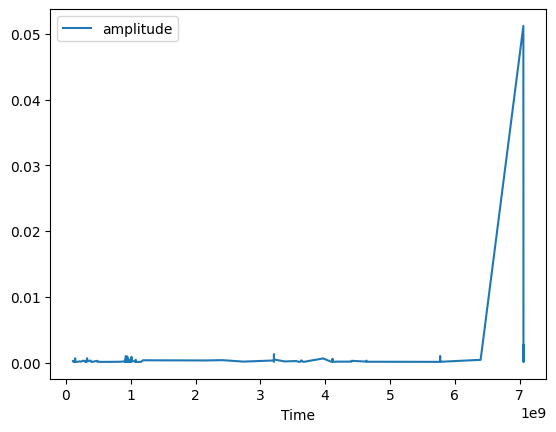

In [ ]:
plt.figure(figsize=(20,14))
df.plot(x='Time', y='amplitude')


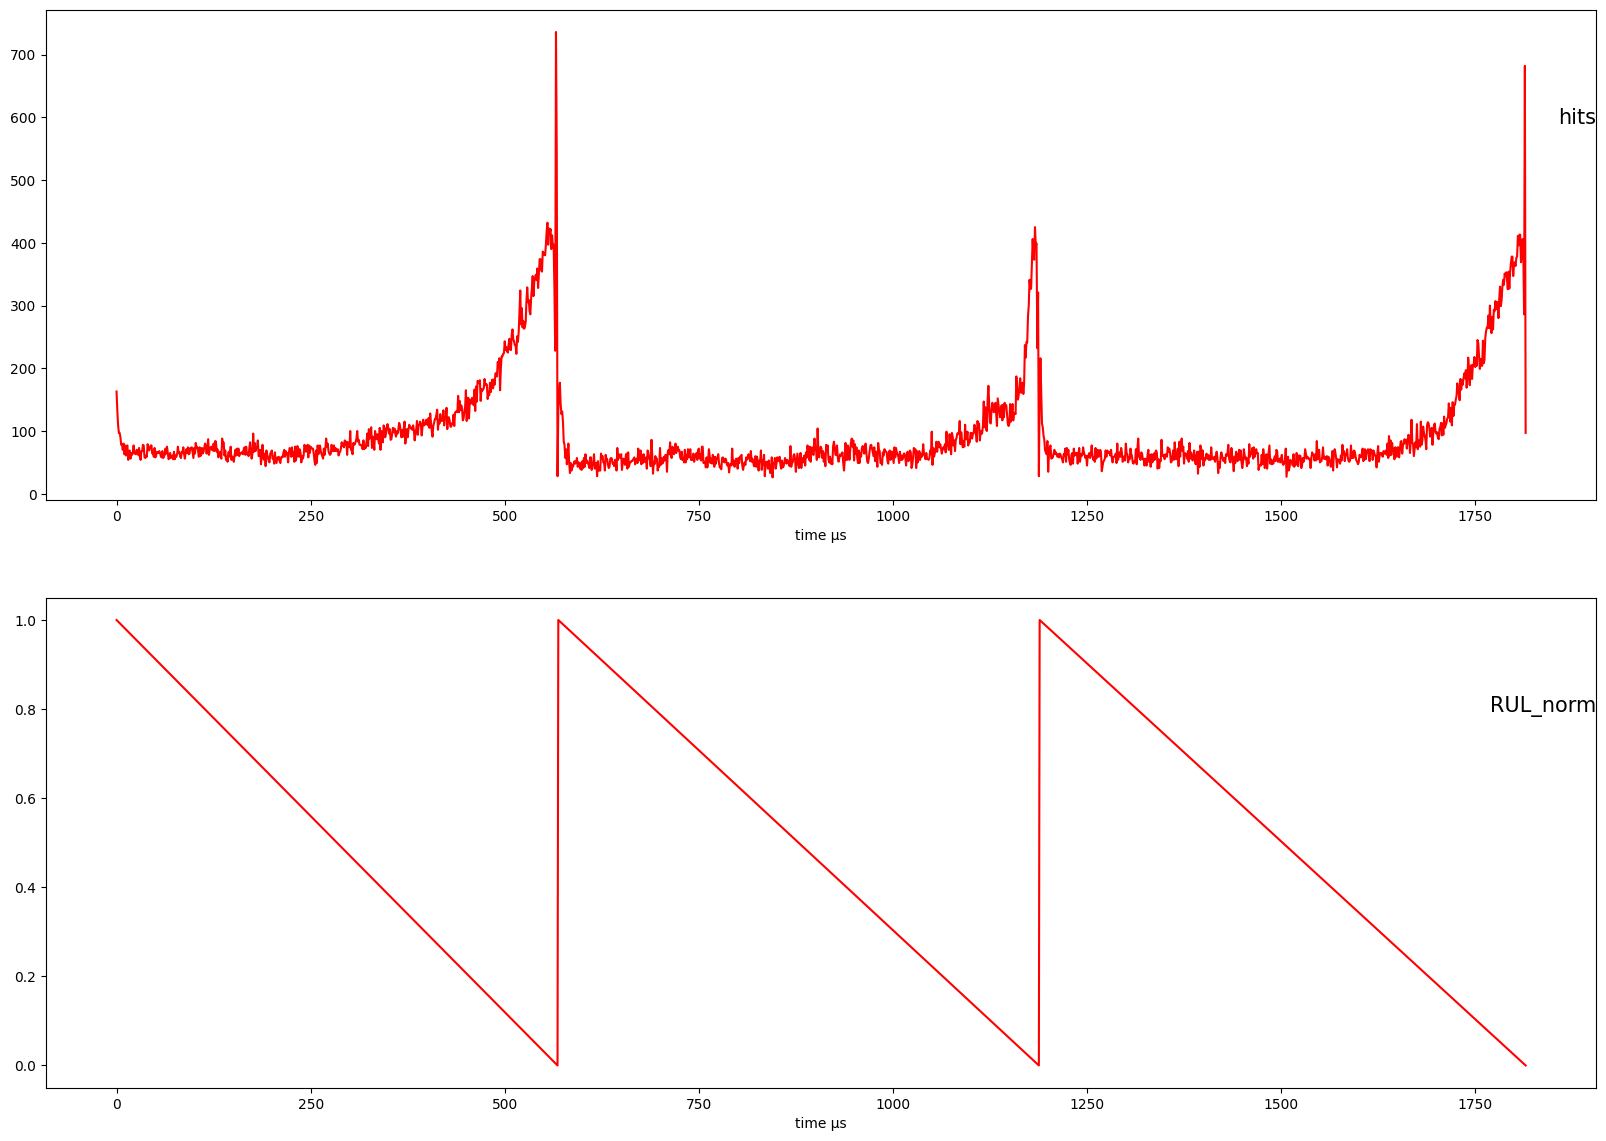

In [ ]:
values = df.values

# specify columns to plot
groups = [0,3]
i = 1

# plot each column
plt.figure(figsize=(20,14))

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(df.index, values[:, group], c = "red")

    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    plt.xlabel('time µs')

    i += 1
plt.show()

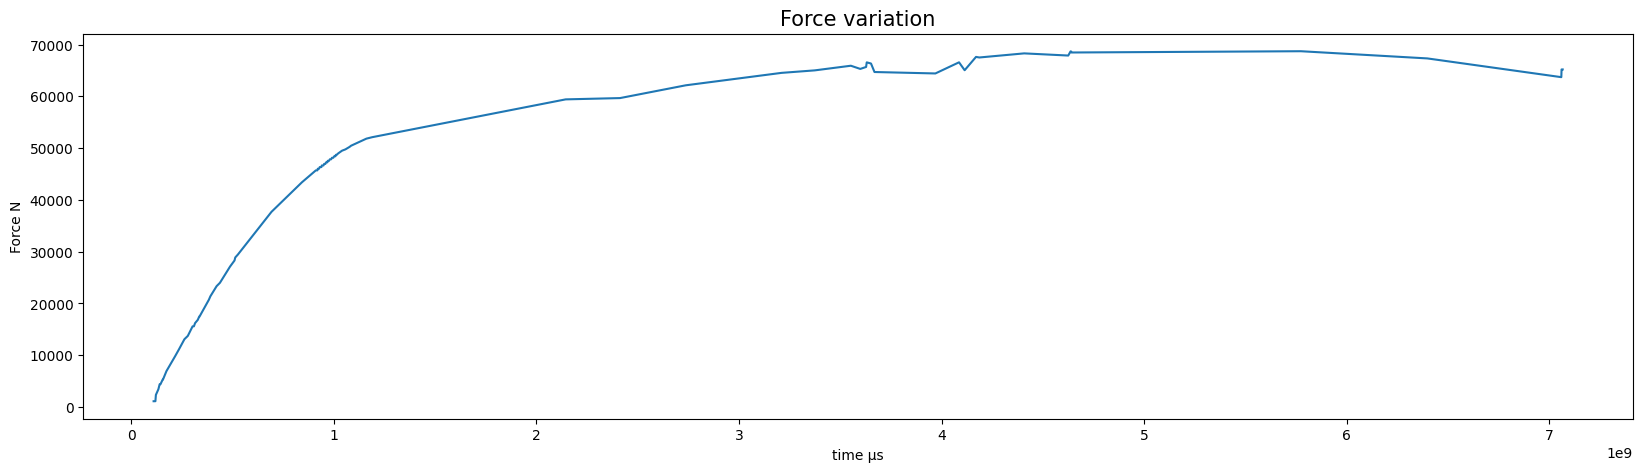

In [ ]:
fig = plt.figure(figsize = (20,5))
plt.plot(df.Time, df.Force)
plt.title("Force variation", fontsize = 15)
plt.xlabel('time µs')
plt.ylabel('Force N')
plt.show()

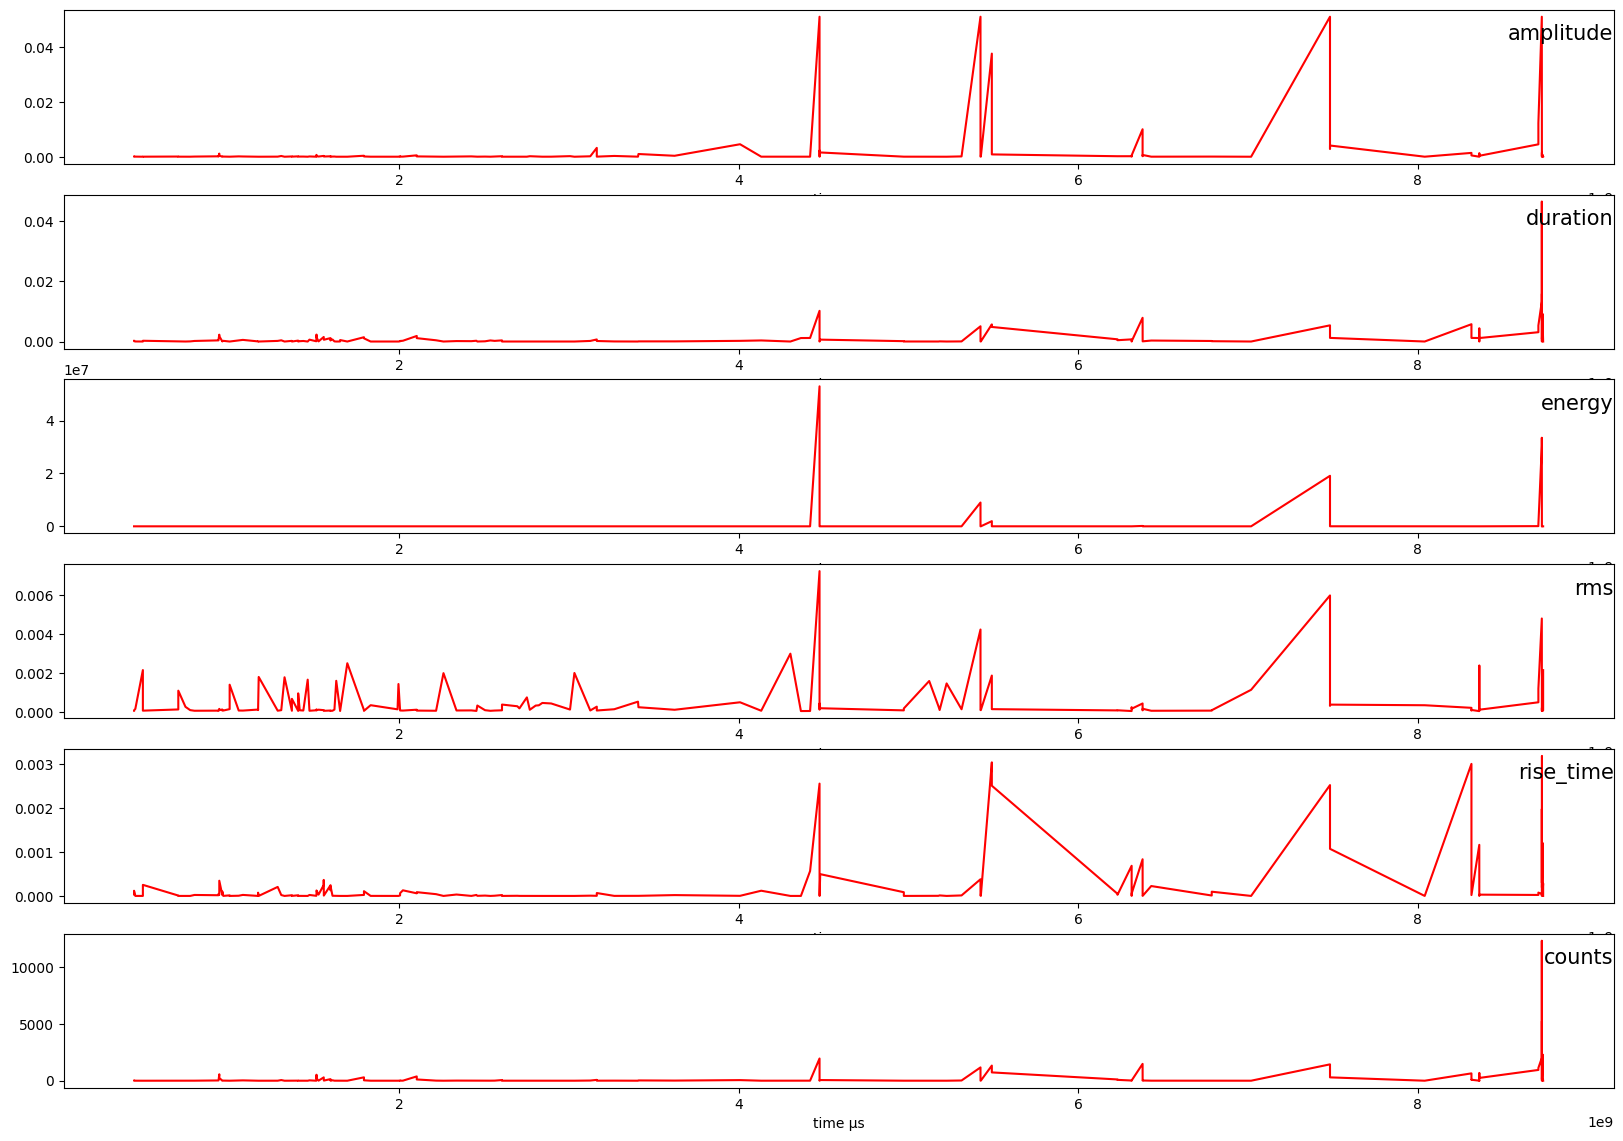

In [ ]:
values = df2.values

# specify columns to plot
groups = [4, 5, 6, 7, 8,9]
i = 1

# plot each column
plt.figure(figsize=(20,14))

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(df2.Time, values[:, group], c = "red")

    plt.title(df2.columns[group], y=0.75, loc='right', fontsize = 15)
    plt.xlabel('time µs')

    i += 1
plt.show()

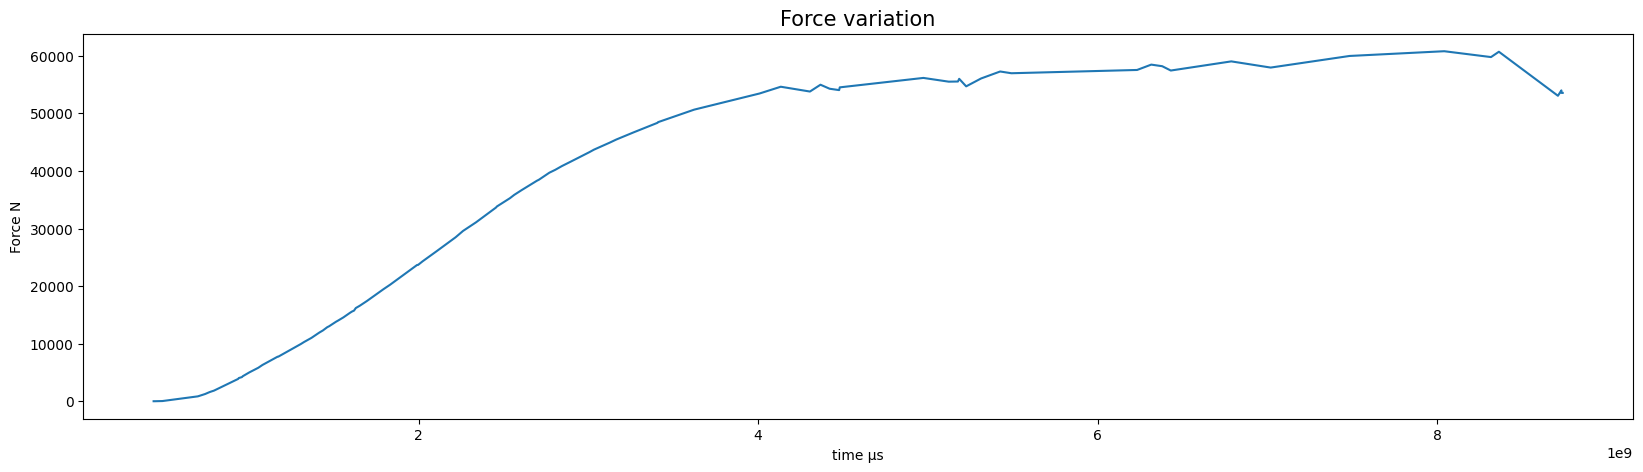

In [ ]:
fig = plt.figure(figsize = (20,5))
plt.plot(df2.Time, df2.Force)
plt.title("Force variation", fontsize = 15)
plt.xlabel('time µs')
plt.ylabel('Force N')
plt.show()

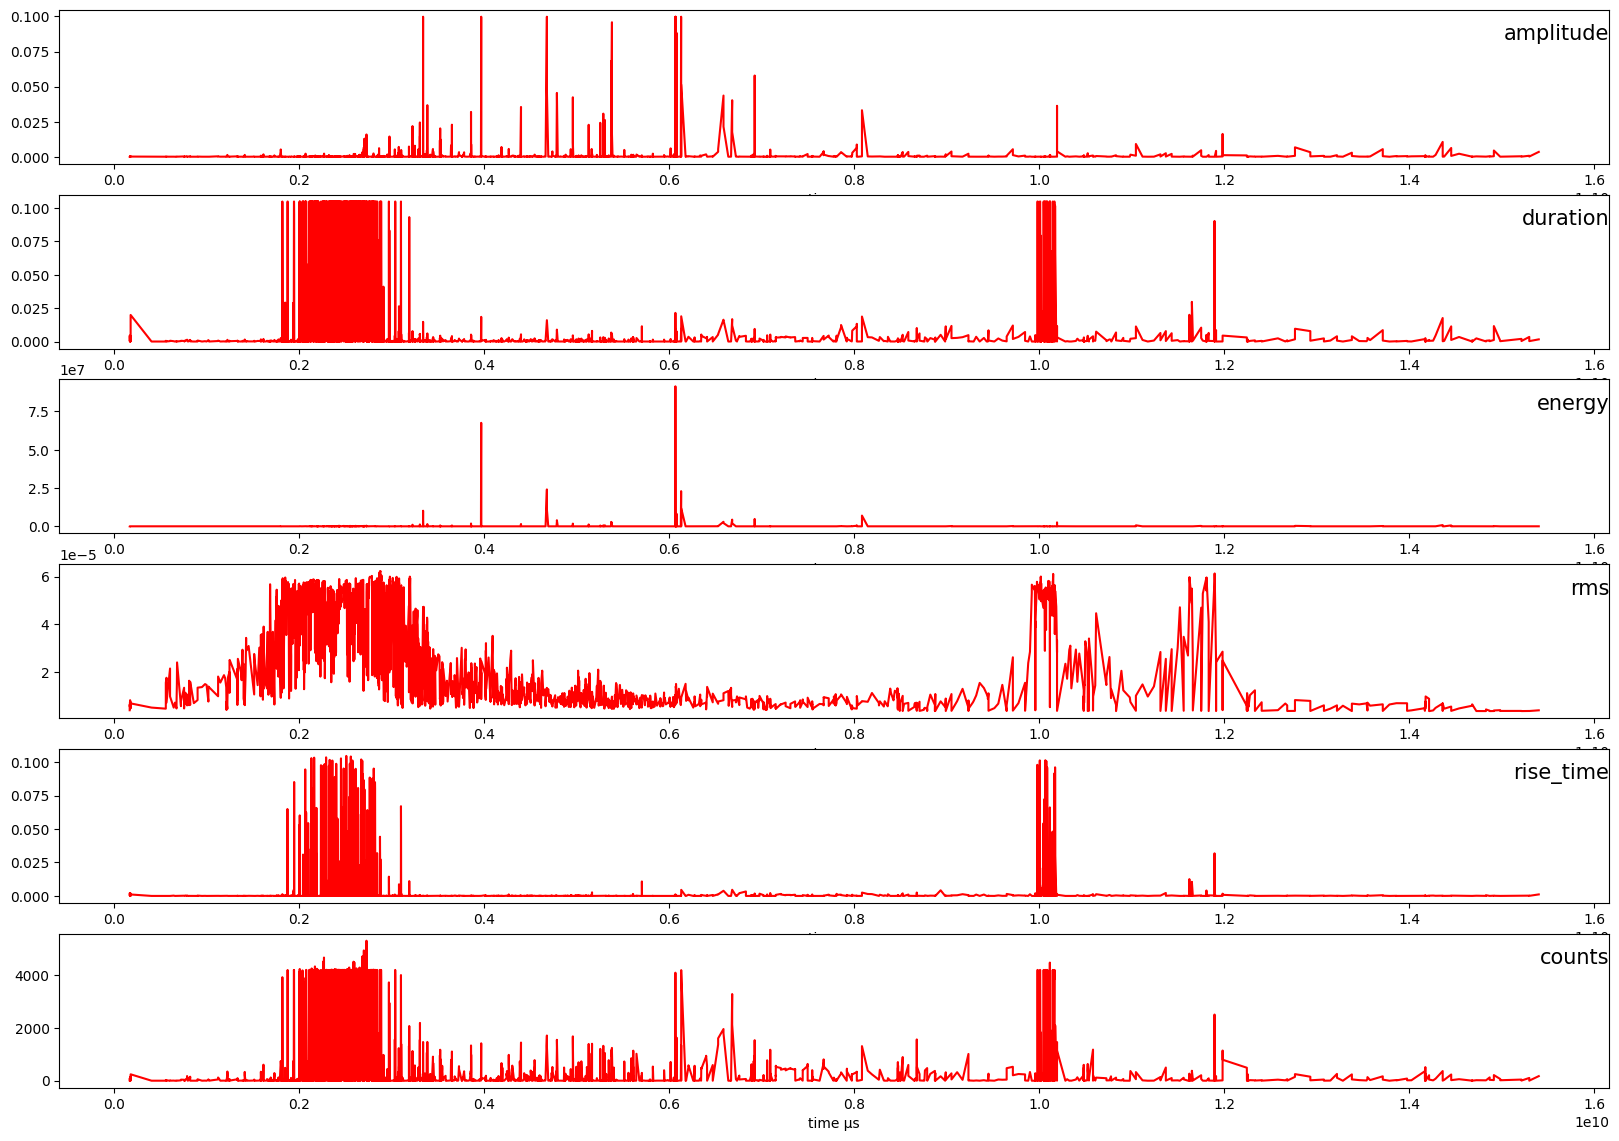

In [ ]:
values = df1.values

# specify columns to plot
groups = [ 5, 6, 7, 8,10,12]
i = 1

# plot each column
plt.figure(figsize=(20,14))

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(df1.Time, values[:, group], c = "red")

    plt.title(df1.columns[group], y=0.75, loc='right', fontsize = 15)
    plt.xlabel('time µs')

    i += 1
plt.show()

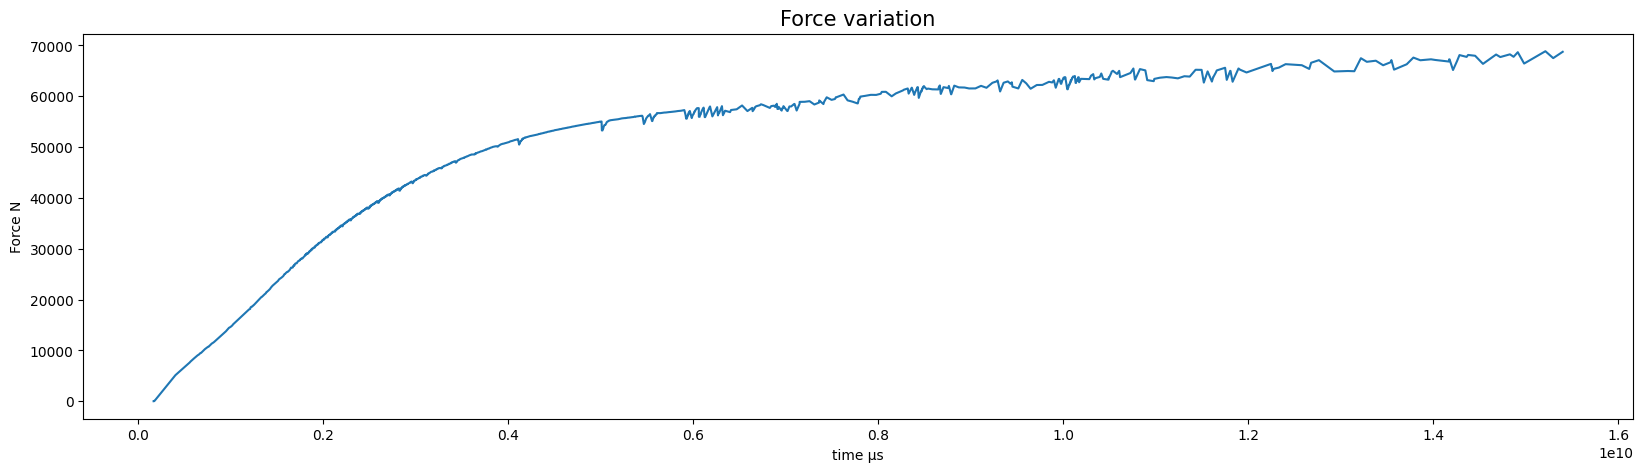

In [ ]:
fig = plt.figure(figsize = (20,5))
plt.plot(df1.Time, df1.Force)
plt.title("Force variation", fontsize = 15)
plt.xlabel('time µs')
plt.ylabel('Force N')
plt.show()

In [ ]:
df['TIME']=df['Time']

In [ ]:
df1['TIME']=df1['Time']+7066547595

In [ ]:
df2['TIME']=df2['Time']+15399736733+7066547595

In [ ]:
df1['TIME']

0       7.232216e+09
1       7.232217e+09
2       7.233479e+09
3       7.233481e+09
4       7.234936e+09
            ...     
4481    2.227930e+10
4482    2.227930e+10
4483    2.236372e+10
4484    2.236372e+10
4485    2.246628e+10
Name: TIME, Length: 4486, dtype: float64

In [ ]:
df2['TIME']

0      2.290624e+10
1      2.290624e+10
2      2.291373e+10
3      2.295822e+10
4      2.295822e+10
           ...     
154    3.119715e+10
155    3.120151e+10
156    3.120221e+10
157    3.120404e+10
158    3.120408e+10
Name: TIME, Length: 159, dtype: float64

In [ ]:
df10=df[['TIME','amplitude','duration','energy','rms','rise_time','counts','Force']]

In [ ]:
df11=df1[['TIME','amplitude','duration','energy','rms','rise_time','counts','Force']]

In [ ]:
df12=df2[['TIME','amplitude','duration','energy','rms','rise_time','counts','Force']]

In [ ]:
df_final=pd.concat([df10, df11, df12],ignore_index=True)

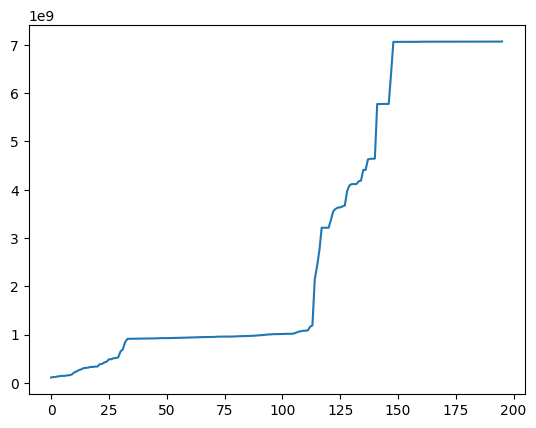

In [ ]:
plt.plot(df.Time)

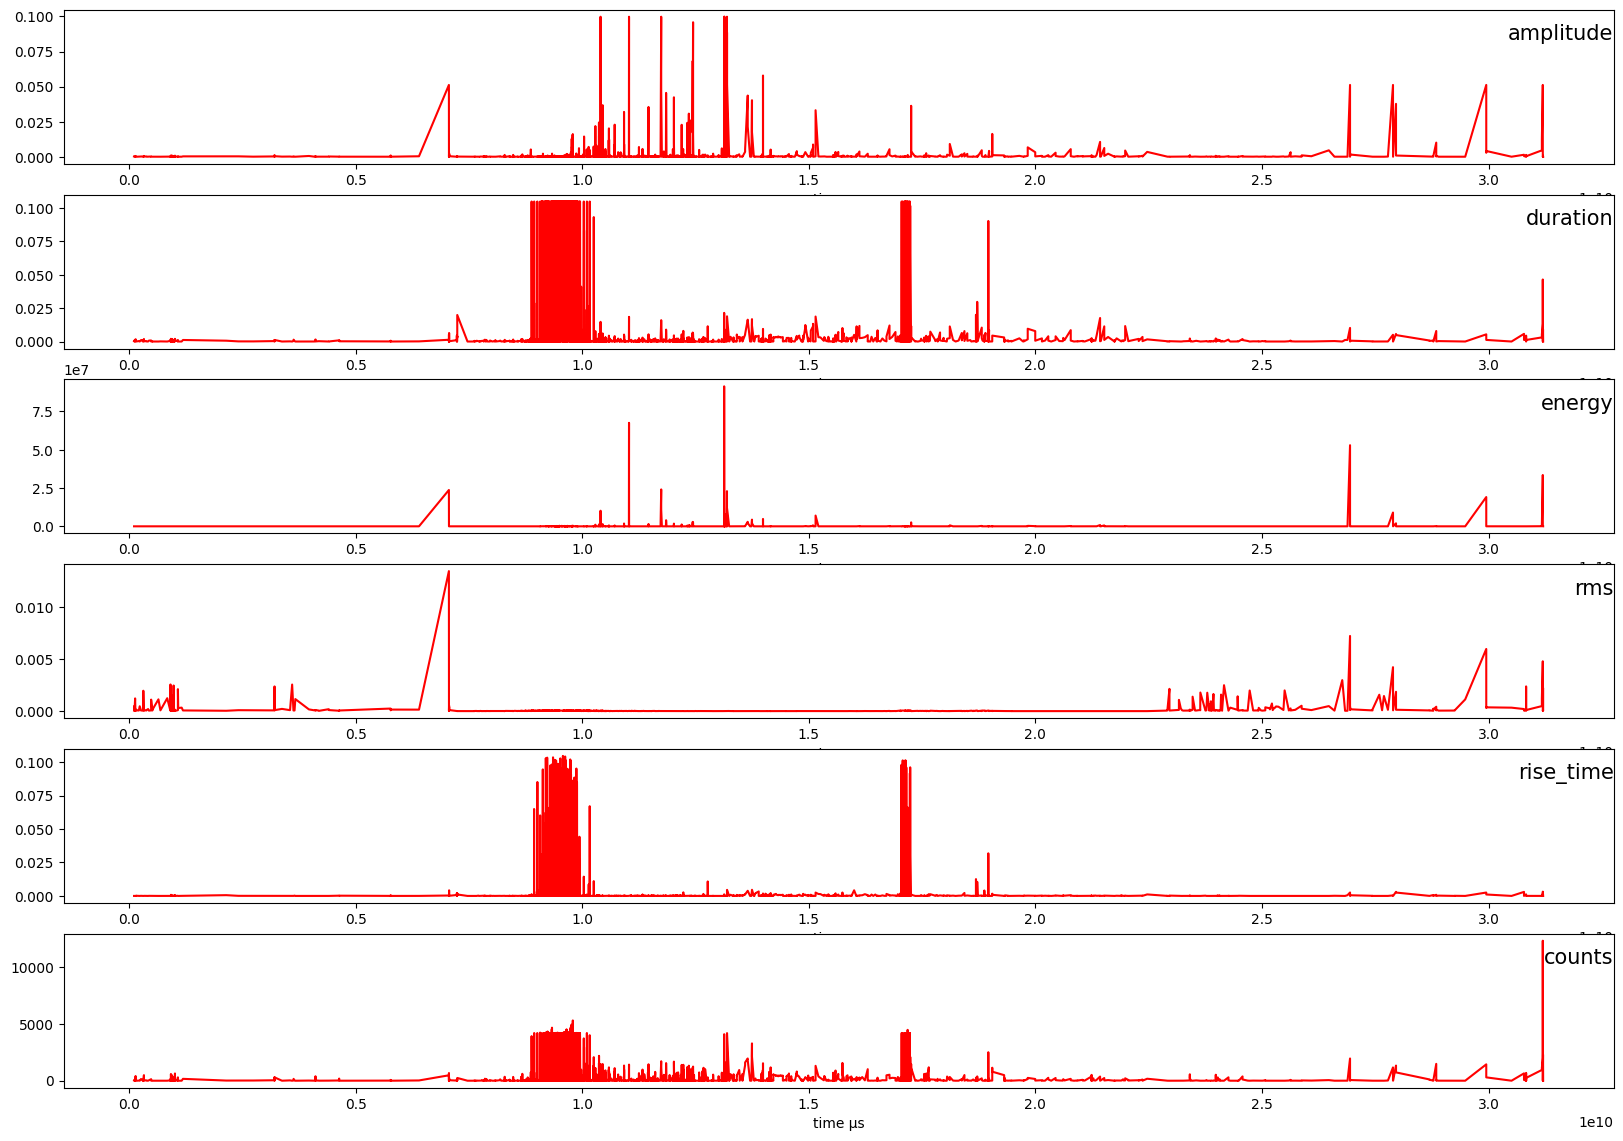

In [ ]:
values = df_final.values

# specify columns to plot
groups = [ 1,2,3,4,5,6]
i = 1

# plot each column
plt.figure(figsize=(20,14))

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(df_final.TIME, values[:, group], c = "red")

    plt.title(df_final.columns[group], y=0.75, loc='right', fontsize = 15)
    plt.xlabel('time µs')

    i += 1
plt.show()

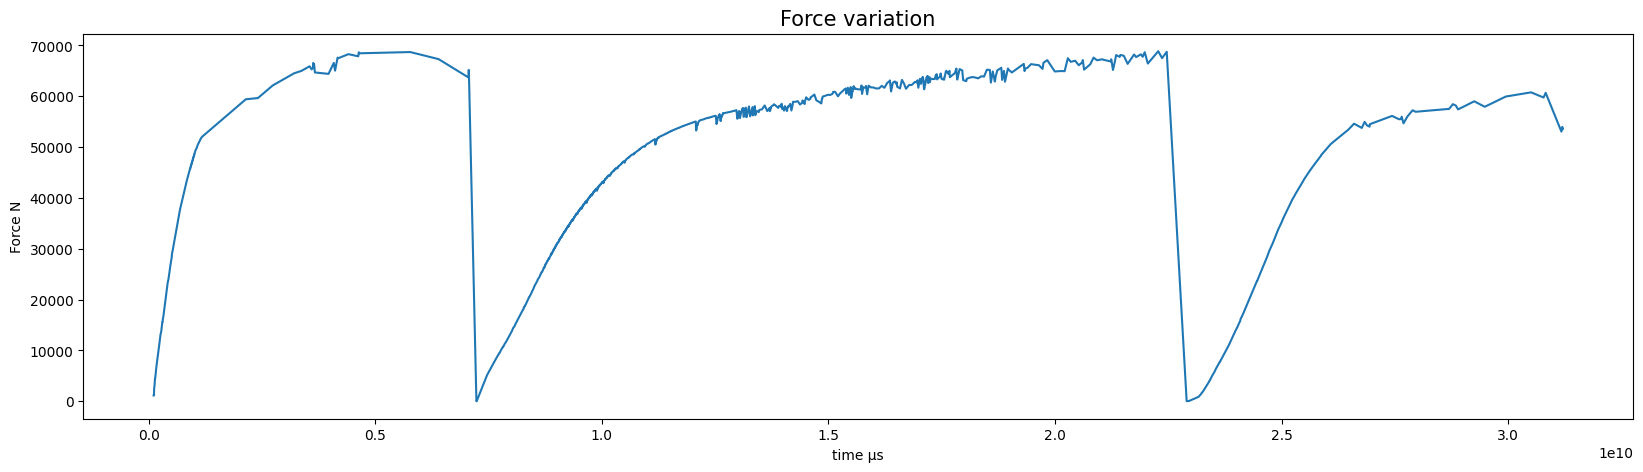

In [ ]:
fig = plt.figure(figsize = (20,5))
plt.plot(df_final.TIME, df_final.Force)
plt.title("Force variation", fontsize = 15)
plt.xlabel('time µs')
plt.ylabel('Force N')
plt.show()

In [ ]:
df_final.to_csv('Time_multivariate.csv')

In [ ]:
df_final = pd.read_csv('/content/full2.csv')

In [ ]:
df_final

,Unnamed: 0,amplitude,duration,energy,rms,rise_time,counts,label
0,0,30,0,0.000000,0.0006,0,4,3113
1,1,29,0,0.000000,0.0006,0,1,3113
2,2,30,0,0.053626,0.0006,0,1,3113
3,3,29,0,0.000000,0.0006,0,1,3113
4,4,31,71,1.109007,0.0006,0,3,3113
...,...,...,...,...,...,...,...,...
247041,13223,71,25780,214563.400000,0.1086,15043,8699,0
247042,13224,33,133,2.374981,0.1086,107,12,0
247043,13225,56,3713,1421.721000,0.1086,1790,781,0
247044,13226,49,3104,326.433800,0.1086,236,494,0


In [ ]:
df_final.drop(columns=df_final.columns[0], axis=1, inplace=True)

In [ ]:
df1=df_final

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_final = pd.read_csv('/content/multivariate.csv', index_col= False)

In [ ]:
df_final.drop(columns=df_final.columns[0], axis=1, inplace=True)

In [ ]:
df1=df_final

In [ ]:
df1

,amplitude,duration,energy,rms,rise_time,counts,label
0,30,0,0.000000,0.0006,0,4,3113
1,29,0,0.000000,0.0006,0,1,3113
2,30,0,0.053626,0.0006,0,1,3113
3,29,0,0.000000,0.0006,0,1,3113
4,31,71,1.109007,0.0006,0,3,3113
...,...,...,...,...,...,...,...
247041,71,25780,214563.400000,0.1086,15043,8699,0
247042,33,133,2.374981,0.1086,107,12,0
247043,56,3713,1421.721000,0.1086,1790,781,0
247044,49,3104,326.433800,0.1086,236,494,0


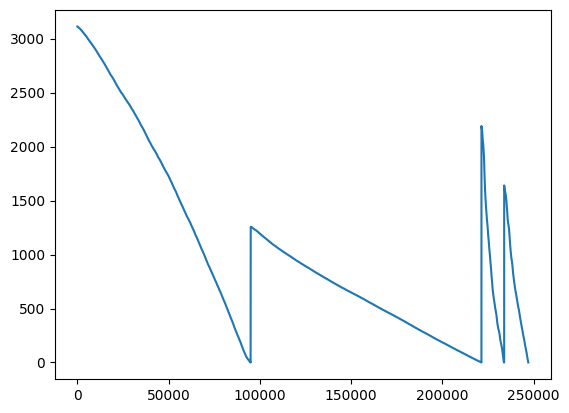

In [ ]:
plt.plot(df_final.label)

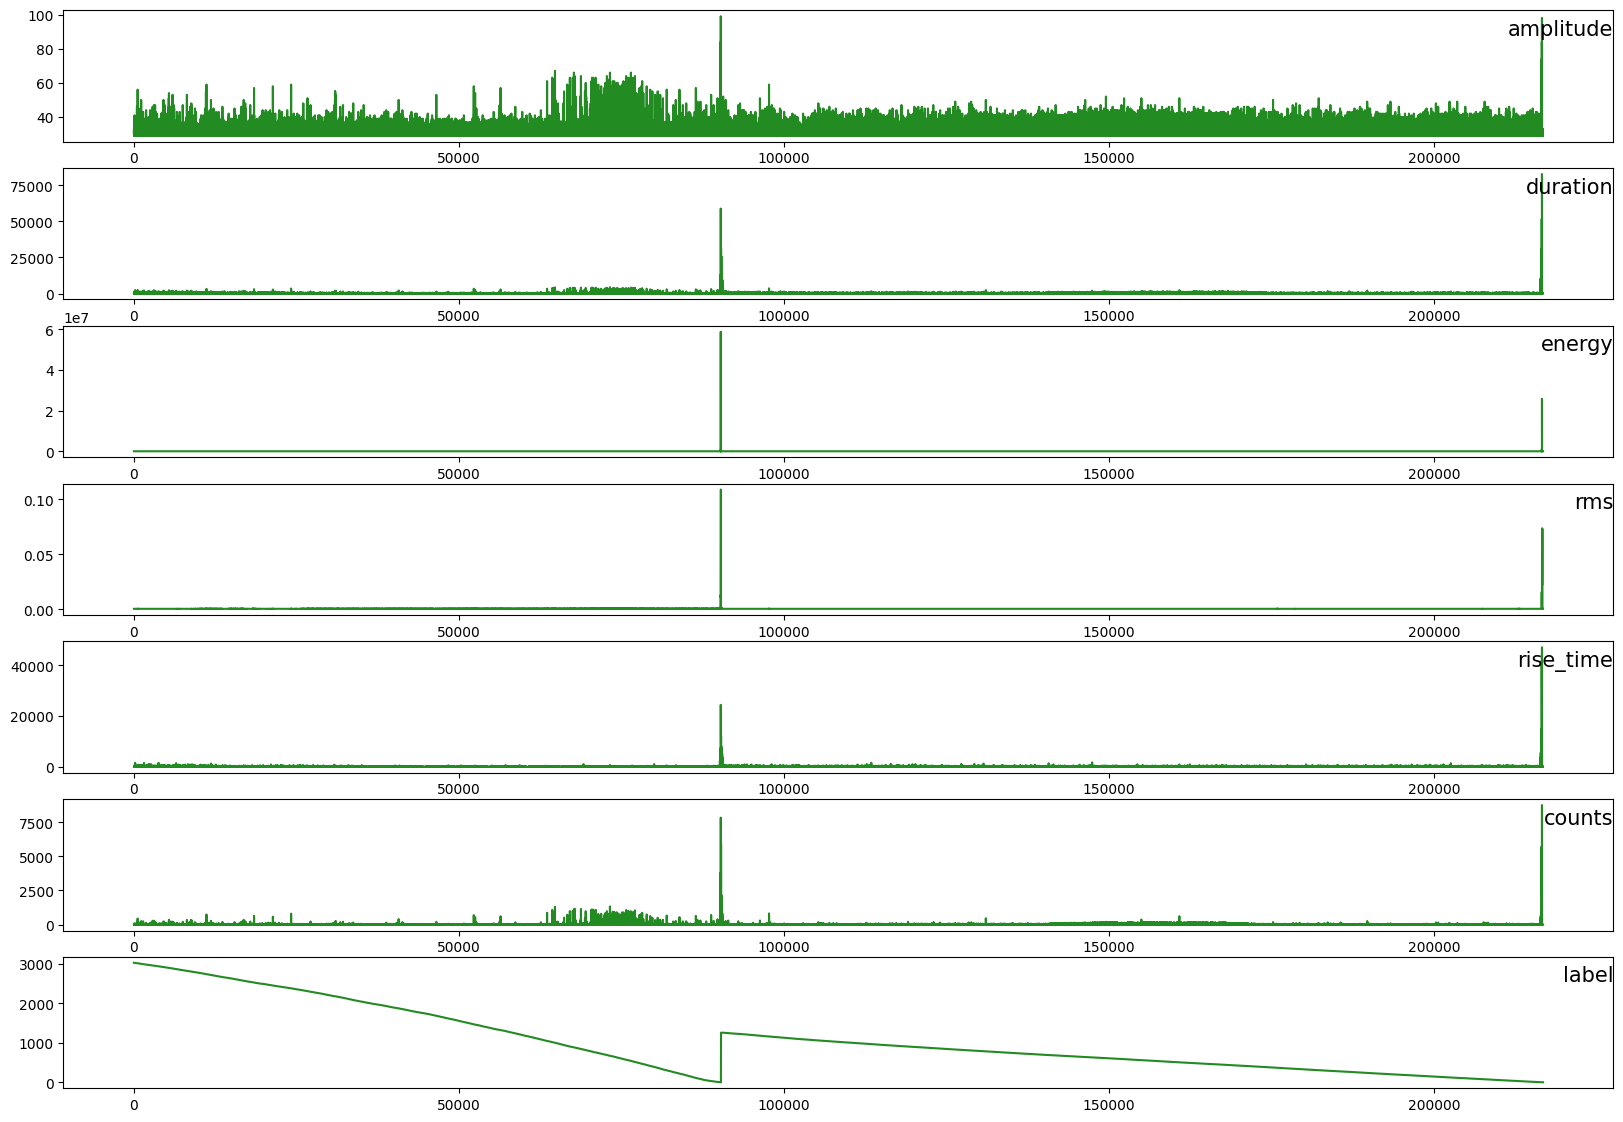

In [ ]:
values = df1.values

# specify columns to plot
groups = [ 0,1, 2, 3, 4,5,6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group][4600:], c = "forestgreen")
    plt.title(df1.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

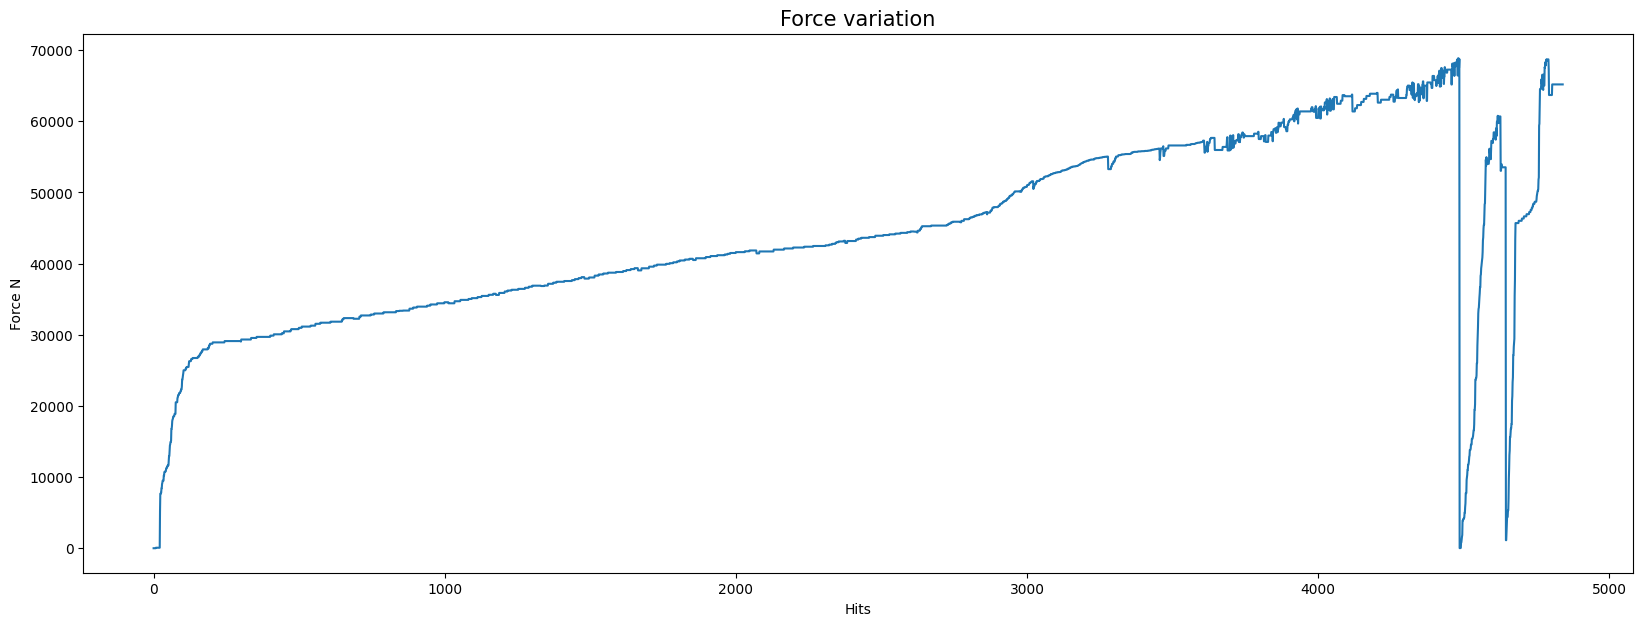

In [ ]:
fig = plt.figure(figsize = (20,7))
plt.plot(df1.Force)
plt.title("Force variation", fontsize = 15)
plt.ylabel('Force N')
plt.xlabel('Hits')
plt.show()

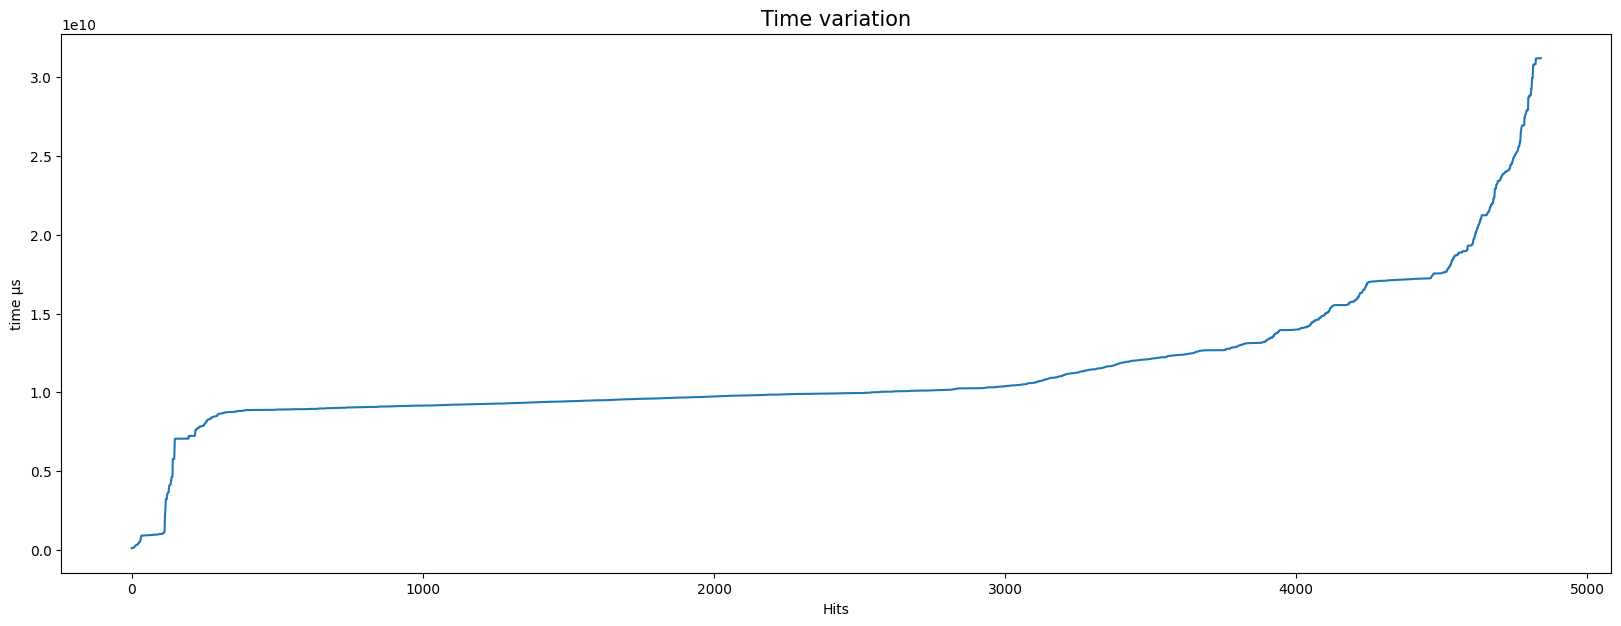

In [ ]:
fig = plt.figure(figsize = (20,7))
plt.plot(df1.TIME)
plt.title("Time variation", fontsize = 15)
plt.ylabel('time µs')
plt.xlabel('Hits')
plt.show()

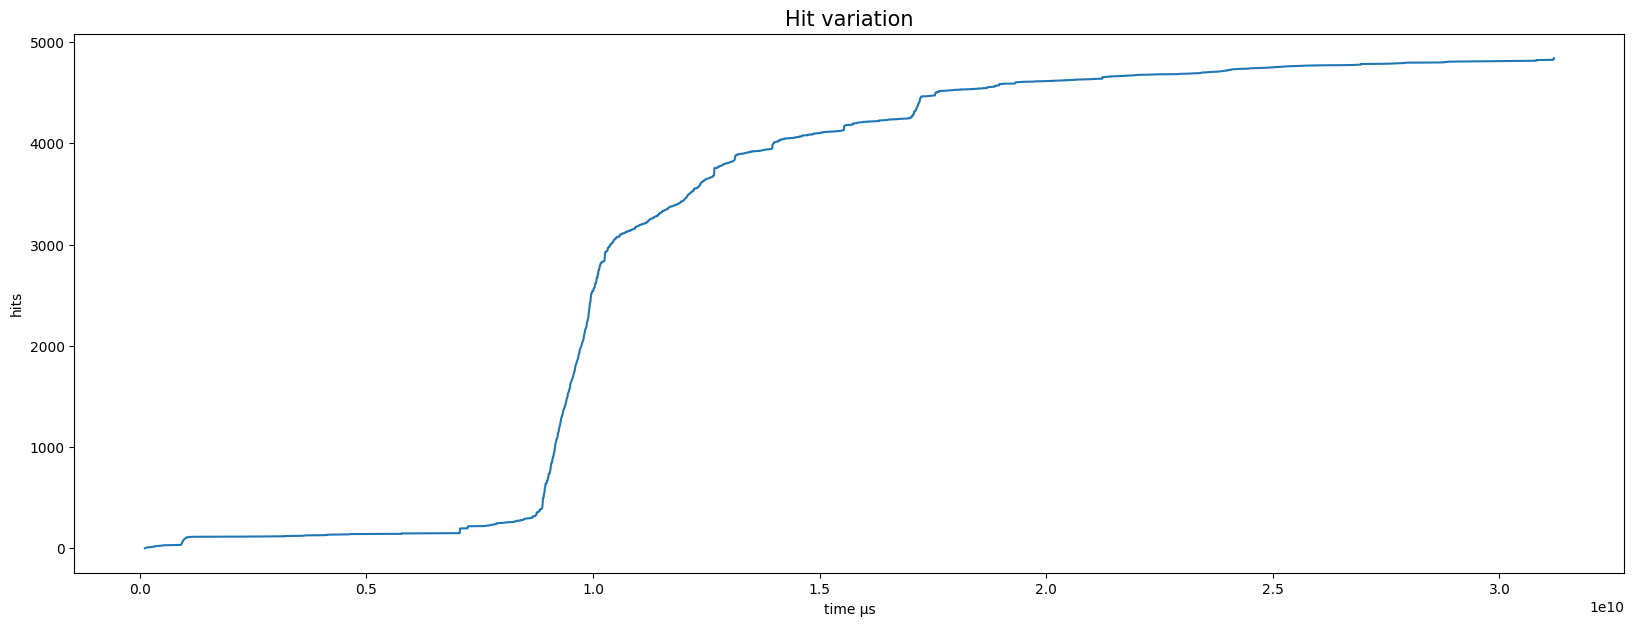

In [ ]:
fig = plt.figure(figsize = (20,7))
plt.plot(df1.TIME, df1.index)
plt.title("Hit variation", fontsize = 15)
plt.ylabel('hits')
plt.xlabel('time µs')
plt.show()

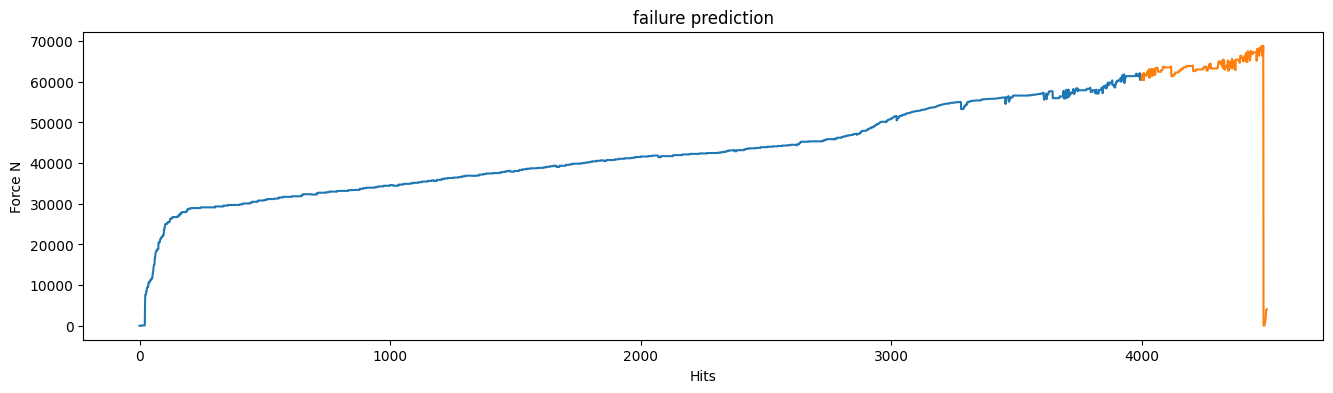

In [ ]:
df_final["Force"][:4000].plot(figsize=(16,4))
df_final["Force"][4000:4500].plot(figsize=(16,4))
#plt.legend(['Training set (Before 100 hit)','Test set (100 hit and beyond)'])
plt.title('failure prediction')
plt.ylabel('Force N')
plt.xlabel('Hits')
plt.show()

no norm

In [ ]:
values = df.values

values = values.astype('float32')



In [ ]:
# converting the dataset as supervised learning

reframed = series_to_supervised(values, 1, 1)
print(reframed.shape)

(1815, 8)


norm

In [ ]:
# Scaling the entire dataset


values = df1.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)

NameError: name 'scaled' is not defined

In [ ]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var1(t)  var2(t)  var3(t)  \
1      163.0        0.0      568.0   1.000000    132.0      1.0    567.0   
2      132.0        1.0      567.0   0.998239    109.0      2.0    566.0   
3      109.0        2.0      566.0   0.996479     97.0      3.0    565.0   
4       97.0        3.0      565.0   0.994718     97.0      4.0    564.0   
5       97.0        4.0      564.0   0.992958     90.0      5.0    563.0   

    var4(t)  
1  0.998239  
2  0.996479  
3  0.994718  
4  0.992958  
5  0.991197  


In [ ]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var1(t)',
       'var2(t)', 'var3(t)', 'var4(t)'],
      dtype='object')

In [ ]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[1,2,3,4,5,6]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)   var4(t)
1      163.0  0.998239
2      132.0  0.996479
3      109.0  0.994718
4       97.0  0.992958
5       97.0  0.991197


without rul input

In [ ]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[0,2,3,4]], axis=1, inplace=True)
print(reframed.head())

   var2(t-1)   var3(t)
1       85.0  0.999679
2       59.0  0.999358
3       69.0  0.999036
4       55.0  0.998715
5       65.0  0.998394


In [ ]:
values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 1188

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1188, 1, 1) (1188,) (627, 1, 1) (627,)


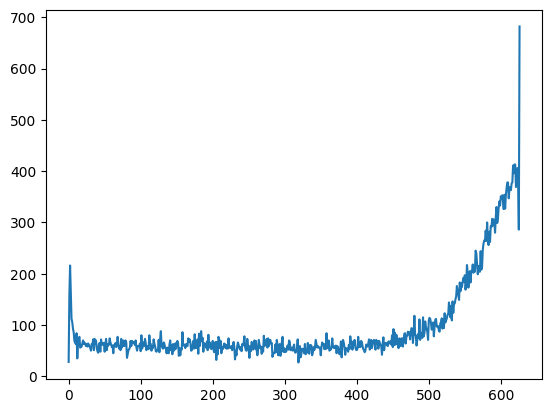

In [ ]:
plt.plot(test_X[:,0,0])

In [ ]:
train.shape, test.shape, values.shape

((10426, 2), (2854, 2), (13280, 2))

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
import keras

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(64))
model.add(LSTM(128))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=64, validation_split=0.2, verbose=2, shuffle=False)

ValueError: Input 0 of layer "lstm_18" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 32)

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=64, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 - 5s - 360ms/step - loss: 0.1779 - val_loss: 0.0354
Epoch 2/20
15/15 - 0s - 13ms/step - loss: 0.1304 - val_loss: 0.1700
Epoch 3/20
15/15 - 0s - 8ms/step - loss: 0.0367 - val_loss: 0.0869
Epoch 4/20
15/15 - 0s - 9ms/step - loss: 0.0377 - val_loss: 0.1151
Epoch 5/20
15/15 - 0s - 10ms/step - loss: 0.0327 - val_loss: 0.1025
Epoch 6/20
15/15 - 0s - 8ms/step - loss: 0.0333 - val_loss: 0.1065
Epoch 7/20
15/15 - 0s - 7ms/step - loss: 0.0329 - val_loss: 0.1064
Epoch 8/20
15/15 - 0s - 8ms/step - loss: 0.0328 - val_loss: 0.1068
Epoch 9/20
15/15 - 0s - 8ms/step - loss: 0.0328 - val_loss: 0.1074
Epoch 10/20
15/15 - 0s - 9ms/step - loss: 0.0327 - val_loss: 0.1076
Epoch 11/20
15/15 - 0s - 8ms/step - loss: 0.0327 - val_loss: 0.1080
Epoch 12/20
15/15 - 0s - 7ms/step - loss: 0.0327 - val_loss: 0.1082
Epoch 13/20
15/15 - 0s - 10ms/step - loss: 0.0328 - val_loss: 0.1085
Epoch 14/20
15/15 - 0s - 8ms/step - loss: 0.0328 - val_loss: 0.1086
Epoch 15/20
15/15 - 0s - 9ms/step - loss: 0.0328 - val_loss: 0.

In [ ]:
import keras
from keras import layers


inputs=keras.Input((1,1))
x=layers.LSTM(32,activation='tanh',return_sequences=True)(inputs)
x=layers.LSTM(64,activation='tanh',return_sequences=True)(x)
x=layers.LSTM(128,activation='tanh',return_sequences=True)(x)

outputs=layers.Dense(1)(x)
model=keras.Model(inputs,outputs)


In [ ]:
model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)          │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 1, 32)               │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 1, 64)               │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 1, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,129 (500.50 KB)

 Trainable params: 128,129 (500.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(train_X, train_y, epochs=50, batch_size=64, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50
131/131 - 7s - 55ms/step - loss: 0.1861 - val_loss: 0.0837
Epoch 2/50
131/131 - 2s - 17ms/step - loss: 0.1025 - val_loss: 0.0753
Epoch 3/50
131/131 - 2s - 18ms/step - loss: 0.1002 - val_loss: 0.0721
Epoch 4/50
131/131 - 1s - 9ms/step - loss: 0.0995 - val_loss: 0.0712
Epoch 5/50
131/131 - 1s - 9ms/step - loss: 0.0989 - val_loss: 0.0714
Epoch 6/50
131/131 - 1s - 8ms/step - loss: 0.0977 - val_loss: 0.0719
Epoch 7/50
131/131 - 1s - 8ms/step - loss: 0.0966 - val_loss: 0.0725
Epoch 8/50
131/131 - 1s - 8ms/step - loss: 0.0957 - val_loss: 0.0730
Epoch 9/50
131/131 - 1s - 8ms/step - loss: 0.0948 - val_loss: 0.0733
Epoch 10/50
131/131 - 1s - 10ms/step - loss: 0.0940 - val_loss: 0.0737
Epoch 11/50
131/131 - 1s - 8ms/step - loss: 0.0934 - val_loss: 0.0739
Epoch 12/50
131/131 - 2s - 14ms/step - loss: 0.0929 - val_loss: 0.0741
Epoch 13/50
131/131 - 2s - 15ms/step - loss: 0.0925 - val_loss: 0.0743
Epoch 14/50
131/131 - 1s - 9ms/step - loss: 0.0922 - val_loss: 0.0744
Epoch 15/50
131/131 - 1

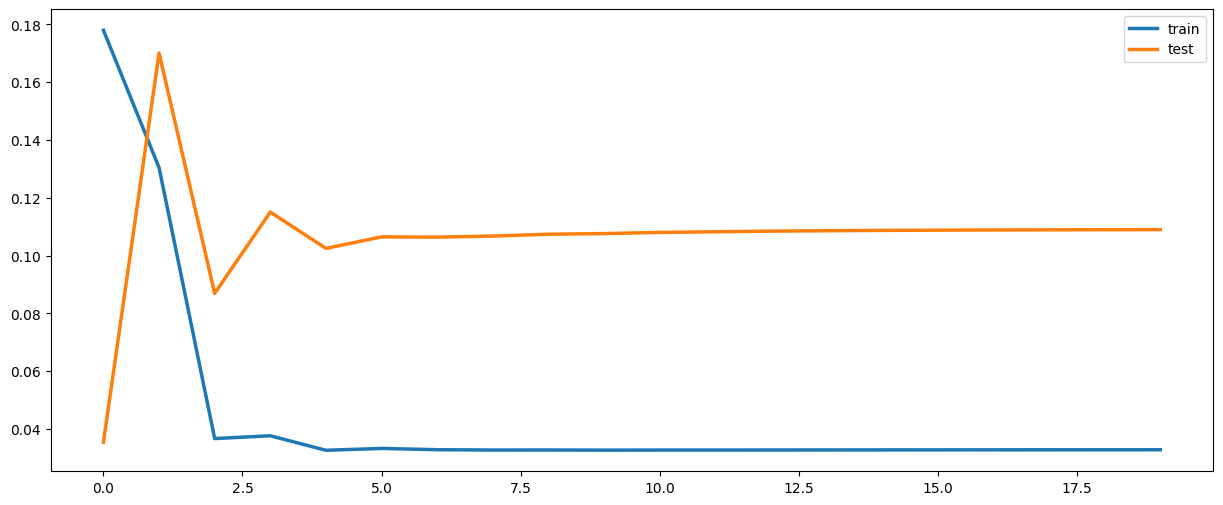

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,653 (201.77 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,436 (134.52 KB)

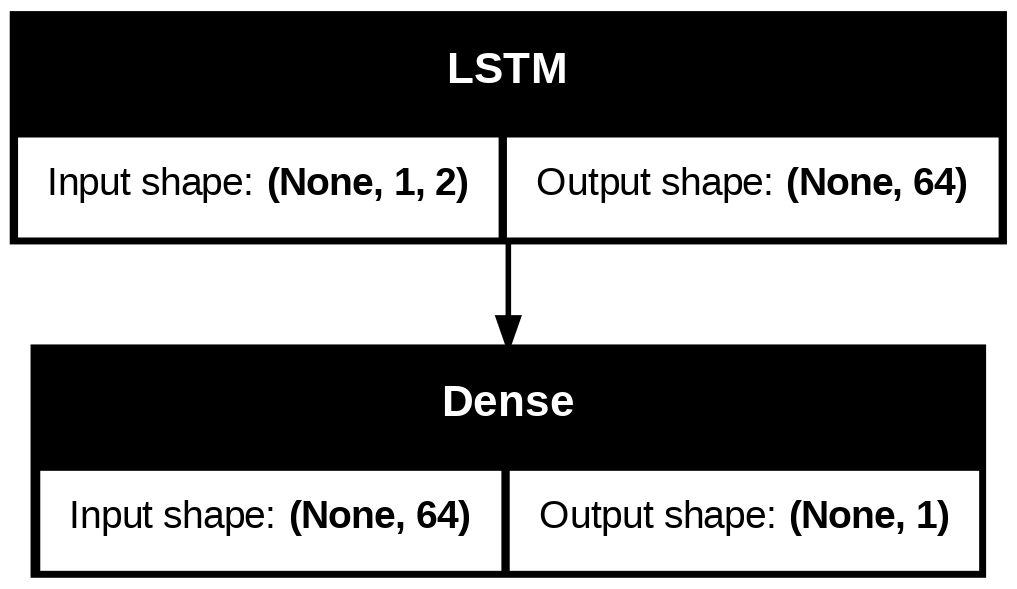

In [ ]:
model.summary()


tf.keras.utils.plot_model(model, to_file="model.png",
           expand_nested=True, show_shapes=True)

In [ ]:
prediction=model.predict(test_X)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


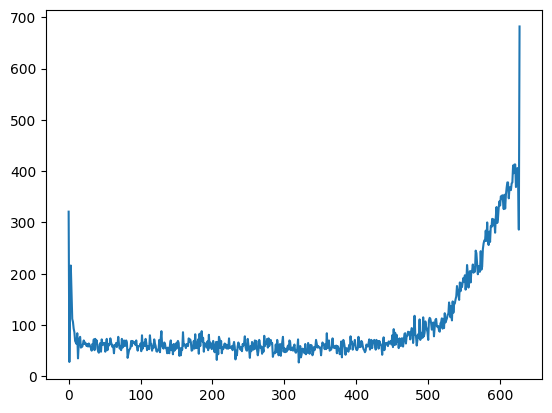

In [ ]:
plt.plot(test_X[:,0])

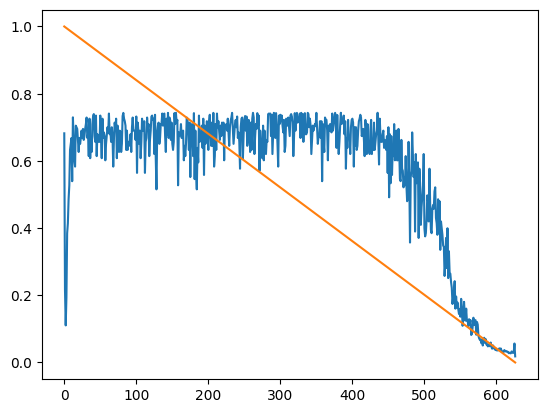

In [ ]:
plt.plot(prediction)
plt.plot(test_y)

In [ ]:
prediction=model.predict(test_X[1870:2870])

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


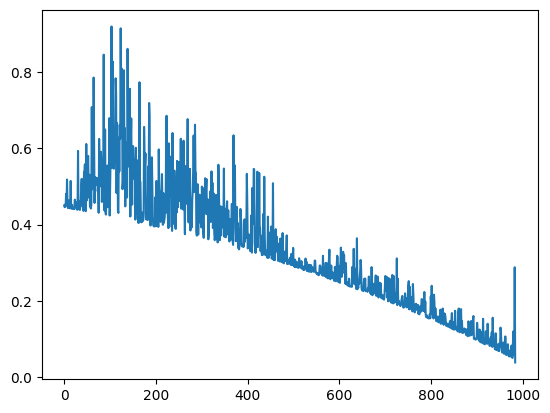

In [ ]:
plt.plot(prediction)

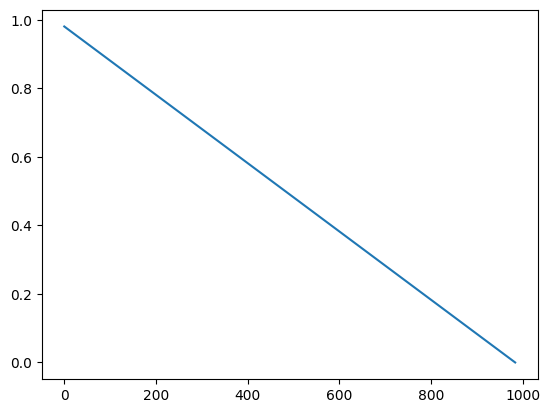

In [ ]:
plt.plot(test_y[1870:2870])

In [ ]:
maxf1= df1.max()

In [ ]:
maxf1

amplitude    9.900000e+01
duration     8.269200e+04
energy       5.891978e+07
rms          1.096000e-01
rise_time    4.702000e+04
counts       9.579000e+03
label        3.113000e+03
dtype: float64

In [ ]:
df_test= pd.read_csv('/content/test_test.csv')

In [ ]:
df_test

,Amplitude,Duration,Absolute Energy,RMS(16),Risetime,Counts,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,31,49,0.652910,0.0016,0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,0,0.000000,0.0016,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31,1021,11.080020,0.0032,263,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29,0,0.000000,0.0032,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,266,2.406449,0.0032,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126467,31,31,0.437942,0.0006,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126468,30,0,0.000000,0.0006,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126469,33,2,0.355456,0.0006,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126470,33,507,7.162462,0.0006,265,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df10=df_test.iloc[:, : 6]

In [ ]:
df10

,Amplitude,Duration,Absolute Energy,RMS(16),Risetime,Counts
0,31,49,0.652910,0.0016,0,9
1,30,0,0.000000,0.0016,0,6
2,31,1021,11.080020,0.0032,263,22
3,29,0,0.000000,0.0032,0,1
4,30,266,2.406449,0.0032,0,6
...,...,...,...,...,...,...
126467,31,31,0.437942,0.0006,0,2
126468,30,0,0.000000,0.0006,0,2
126469,33,2,0.355456,0.0006,1,1
126470,33,507,7.162462,0.0006,265,16


In [ ]:
# Inverse scaling the output, for better visual interpretation

poll_amp = np.array(df1["amplitude"])
meanop_amp = poll_amp.mean()
stdop_amp = poll_amp.std()

print(meanop_amp, stdop_amp)



30.81236893960948 2.3272302430587932


In [ ]:
# Inverse scaling the output, for better visual interpretation

poll_dur = np.array(df1["duration"])
meanop_dur = poll_dur.mean()
stdop_dur = poll_dur.std()

print(meanop_dur, stdop_dur)



9.281688953519005 118.70732626045113


In [ ]:
# Inverse scaling the output, for better visual interpretation

poll_enr = np.array(df1["energy"])
meanop_enr = poll_enr.mean()
stdop_enr = poll_enr.std()

print(meanop_enr, stdop_enr)



910.3657649634661 208456.44027086833


In [ ]:
# Inverse scaling the output, for better visual interpretation

poll_rms = np.array(df1["rms"])
meanop_rms = poll_rms.mean()
stdop_rms = poll_rms.std()

print(meanop_rms, stdop_rms)



0.0005824170960705593 0.0010517808041370317


In [ ]:
# Inverse scaling the output, for better visual interpretation

poll_rise = np.array(df1["ride_time"])
meanop_rise = poll_rise.mean()
stdop_rise = poll_rise.std()

print(meanop_rise, stdop_rise)



9.281688953519005 118.70732626045113


In [ ]:
# Inverse scaling the output, for better visual interpretation

poll_cnt = np.array(df1["counts"])
meanop_cnt = poll_cnt.mean()
stdop_cnt = poll_cnt.std()

print(meanop_cnt, stdop_cnt)



5.48302932591492 43.8021254788987


In [ ]:
# Inverse scaling the output, for better visual interpretation

poll_lbl = np.array(df1["label"])
meanop_lbl = poll_lbl.mean()
stdop_lbl = poll_lbl.std()

print(meanop_lbl, stdop_lbl)



1708.9580817500712 920.2204247718735


In [ ]:
maxf1

amplitude    9.900000e+01
duration     8.269200e+04
energy       5.880000e+07
rms          1.090000e-01
rise_time    4.702000e+04
counts       8.757000e+03
label        3.113000e+03
dtype: float64

In [ ]:
a1=9.900000e+01
a2=2.437100e+04
a3=5.880000e+07
a4=1.090000e-01
a5=2.437100e+04
a6=.834000e+03
a7=3.113000e+03

In [ ]:
c= np.concatenate(a1,a2,a3)

TypeError: 'float' object is not iterable

In [ ]:
y_test_true = y_test_true*stdop + meanop
testPredict2 = testPredict2*stdop + meanop

In [ ]:
df10.values[0][0]/3

10.333333333333334

In [ ]:
x = df10.values[0]

In [ ]:
x[0]

31.0

In [ ]:
y=test_X[0][0]
y

array([4.        , 0.95906734], dtype=float32)

In [ ]:
yf.shape

(6,)

In [ ]:
x1=1
z=[]
c=[]

In [ ]:
for i in range (len(test_X)):

  y=test_X[i][0]
  y1=y[0]

  c.extend([y1,x1])
  yf= np.array(c)

  #yf=np.append(y1,y2,,x1)
  #y.append(x)
  yff=yf.reshape(-1,1,2)

  x=model.predict(yff)
  x1=x[0][0]
  print(x1)
  z.append(x1)
  c.clear()
  #plt.plot(z[0])



Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0.14467558
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.15005562
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0.16540988
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
0.18968228
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.22216246
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
0.16760162
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.16720322
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.14666344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.12592554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.14667778
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.19560483
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.18835554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.17123228
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
0.1361035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.13388306
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.1749575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0.19749941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
0.16741288
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.16706139
1/1 ━━━━━━━━━━━━━━━━

In [ ]:
c

[0.0,
 0.0,
 0.0,
 0.014678899082568808,
 0.0,
 0.007194244604316547,
 array([[1.0095651]], dtype=float32)]

In [ ]:
x1[0][0]

1.0095651

In [ ]:
z

[1.0095651,
 1.0205783,
 1.0285492,
 1.0423687,
 1.055907,
 1.0703667,
 1.0876006,
 1.1066595,
 1.1282187,
 1.1506323,
 1.1759708,
 1.2048997,
 1.2364591,
 1.2718881,
 1.3114772,
 1.3549454,
 1.404443,
 1.4602089,
 1.5209945,
 1.5908039,
 1.6705523,
 1.7587218,
 1.8591145,
 1.9702295,
 2.0970376,
 1.481166,
 1.5438905,
 1.6122034,
 1.4310865,
 1.4884866,
 1.553476,
 1.618794,
 1.700726,
 1.7932074,
 1.8970493,
 2.016077,
 2.1488311,
 2.2936294,
 2.45243,
 2.6243598,
 2.8065083,
 2.9980729,
 3.1907446,
 3.3784738,
 3.555204,
 3.711911,
 3.85436,
 3.9762018,
 4.073744,
 4.1569877,
 4.2222304,
 4.274695,
 4.311863,
 4.336293,
 4.3592057,
 4.3768387,
 4.3891234,
 4.401035,
 4.411369,
 4.4149127,
 4.4169116,
 3.8655486,
 3.984817,
 4.075106,
 4.150439,
 4.1304445,
 4.1978374,
 4.2522397,
 4.296955,
 4.330354,
 4.3535485,
 4.370635,
 4.3836675,
 4.3978086,
 4.4070654,
 4.4131193,
 4.4168754,
 4.417294,
 4.4235535,
 4.420858,
 4.4236984,
 4.426819,
 4.427618,
 4.4300127,
 4.43292,
 4.4298263,

In [ ]:
z[1][0][0]

24999.908

In [ ]:
N=[]

In [ ]:
for i in range(len(z)):
  N.append(z[i][0][0])


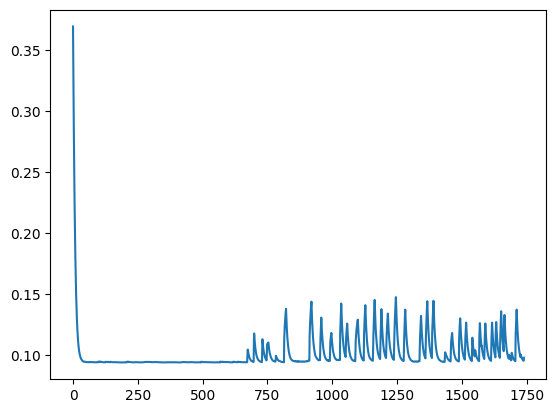

In [ ]:
plt.plot(z)

In [ ]:
y1.reshape(-1,1,7)

array([[[3.100000e+01, 4.900000e+01, 6.529103e-01, 1.600000e-03,
         0.000000e+00, 9.000000e+00, 3.000000e+03]]])

In [ ]:
z[2]

array([[0.13765551]], dtype=float32)

In [ ]:
y1.shape

(7,)

In [ ]:
test_X.shape

(0, 1, 7)

time

In [ ]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

8/8 [==============================] - 1s 3ms/step
(240, 1)
(240,)


force

In [ ]:
testPredict1 = model.predict(test_X)
print(testPredict1.shape)
testPredict1 = testPredict1.ravel()

print(testPredict1.shape)

8/8 [==============================] - 0s 3ms/step
(240, 1)
(240,)


rul

In [ ]:
testPredict1 = model.predict(test_X)
print(testPredict1.shape)
testPredict1 = testPredict1.ravel()

print(testPredict1.shape)

377/377 [==============================] - 1s 2ms/step
(12045, 1)
(12045,)


In [ ]:
test.shape

(126472, 8)

In [ ]:
print(test), print(test.shape)

[[6.1782420e-01 7.3748606e-04 6.7987503e-03 ... 2.4372411e-03
  9.5514852e-01 9.5514852e-01]
 [6.1785519e-01 6.6111318e-04 4.5623821e-03 ... 9.7489648e-04
  9.5514852e-01 9.4332337e-01]
 [6.1807543e-01 4.4726918e-04 1.2130748e-03 ... 3.2496548e-04
  9.4332337e-01 9.4972306e-01]
 ...
 [9.9991739e-01 6.9925226e-03 8.7125860e-02 ... 1.8669267e-01
  7.7741510e-01 7.7741510e-01]
 [9.9993968e-01 1.5364735e-03 3.4482032e-02 ... 2.0879032e-02
  7.7741510e-01 7.7741510e-01]
 [9.9999857e-01 2.3517455e-04 3.2205612e-03 ... 6.4993097e-04
  7.7741510e-01 7.7741510e-01]]
(240, 9)


(None, None)

In [ ]:
y_test_true = test[:,7]

In [ ]:
y_test_true

array([0.4847414, 0.4847414, 0.4847414, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

In [ ]:
y_test_true

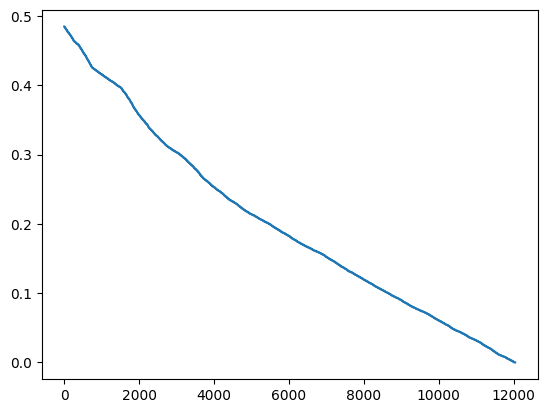

In [ ]:
plt.plot(y_test_true)

time

In [ ]:
y_test_true = test[:,0]

force

In [ ]:
y_test_true1 = test[:,8]

In [ ]:
poll = np.array(df1["Force"])

meanop = poll.mean()
stdop = poll.std()

y_test_true1 = y_test_true1*stdop + meanop
testPredict1 = testPredict1*stdop + meanop

In [ ]:
poll = np.array(df1["TIME"])

meanop = poll.mean()
stdop = poll.std()

y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

In [ ]:
num_list = list(range(1,12046))

In [ ]:
len(num_list)

12045

In [ ]:
len(y_test_true)

240

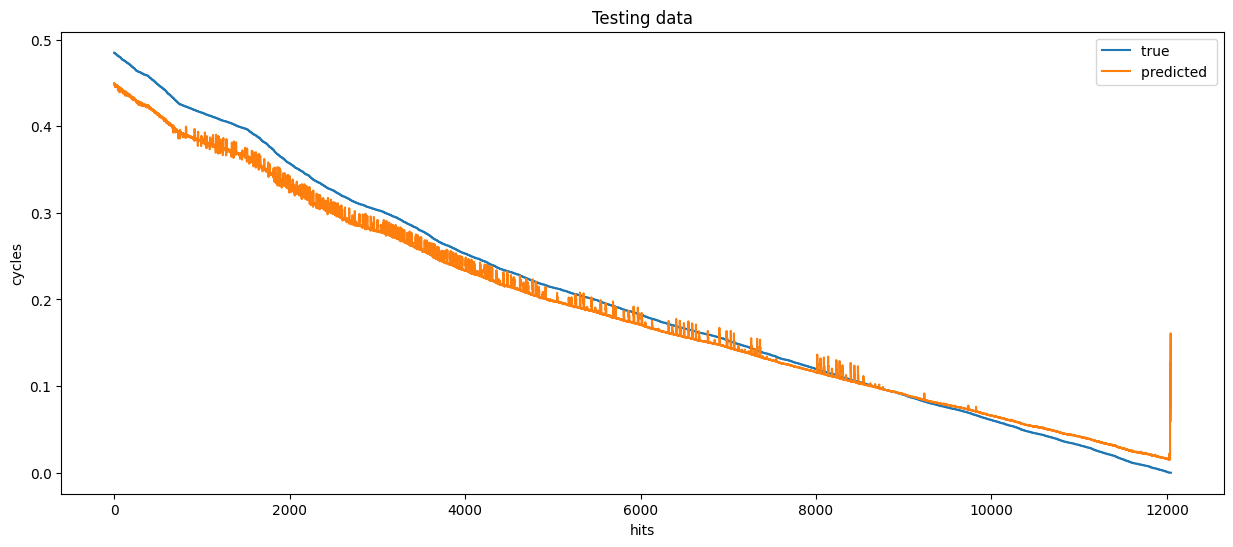

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))

plt.ylabel("cycles")
plt.xlabel("hits")
plt.plot(num_list, y_test_true,label='true ')
plt.plot(num_list, testPredict1,label='predicted ')
plt.title("Testing data")
plt.legend(loc='best')
plt.show()



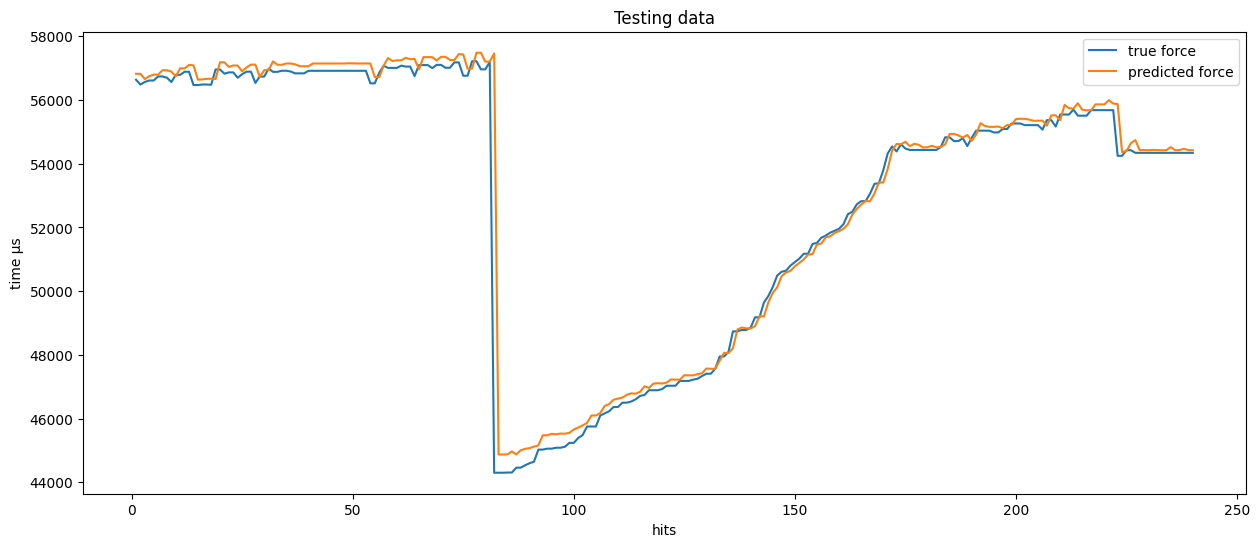

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))

plt.ylabel("time µs")
plt.xlabel("hits")
plt.plot(num_list, y_test_true1,label='true force')
plt.plot(num_list, testPredict1,label='predicted force')
plt.title("Testing data")
plt.legend(loc='best')
plt.show()



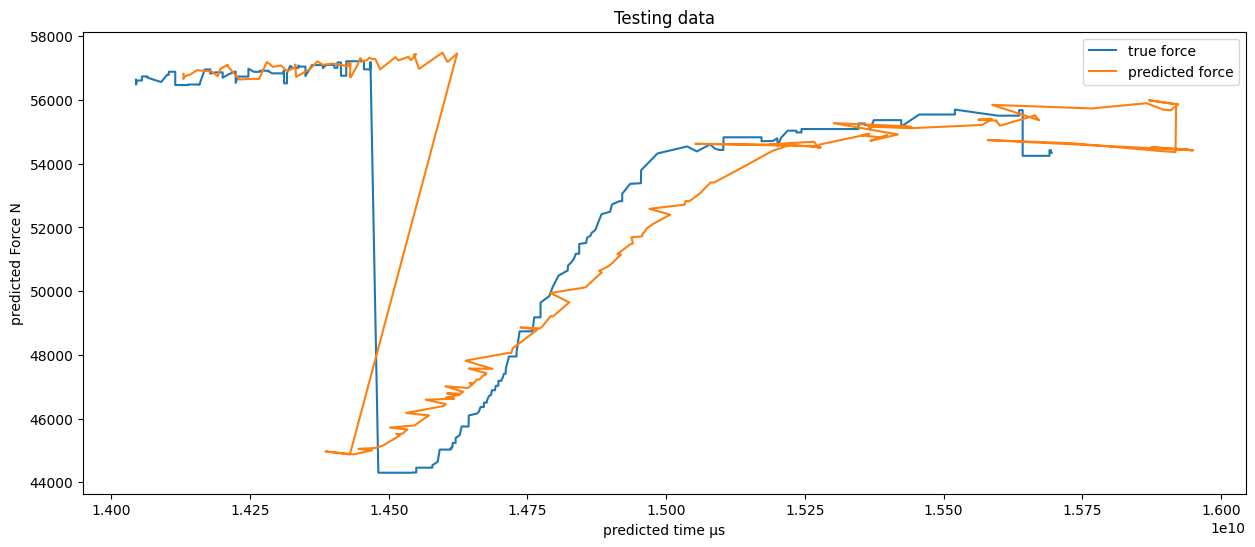

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))

plt.ylabel("predicted Force N")
plt.xlabel("predicted time µs")
plt.plot(y_test_true, y_test_true1,label='true force')
plt.plot(testPredict, testPredict1,label='predicted force')
plt.title("Testing data")
plt.legend(loc='best')
plt.show()

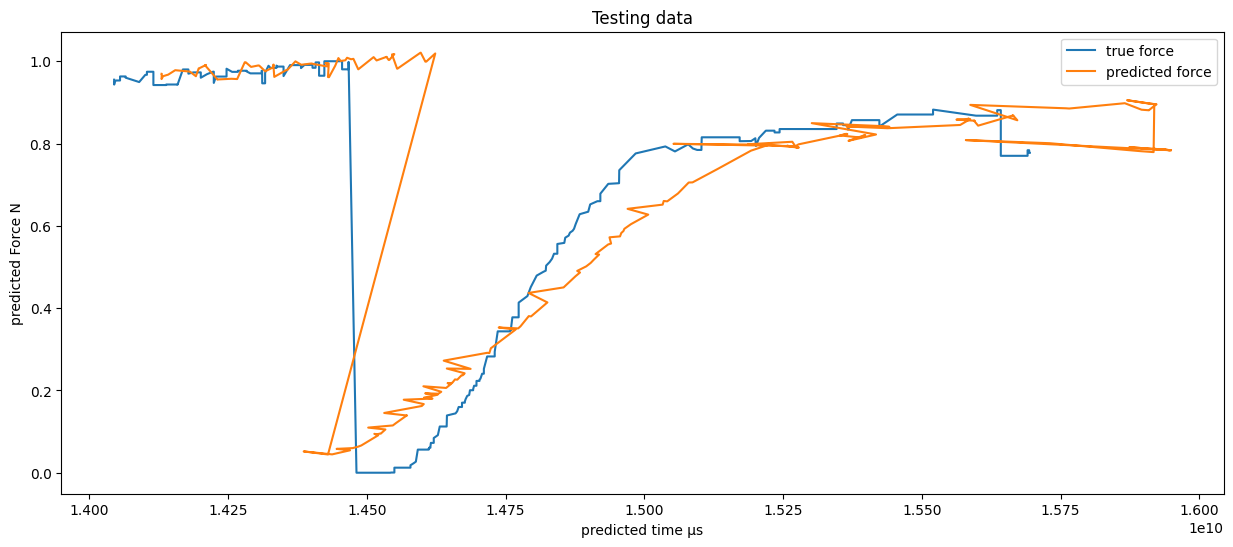

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))

plt.ylabel("predicted Force N")
plt.xlabel("predicted time µs")
plt.plot(y_test_true, y_test_true1,label='true force')
plt.plot(testPredict, testPredict1,label='predicted force')
plt.title("Testing data")
plt.legend(loc='best')
plt.show()

In [ ]:
poll = np.array(df1["Force"])

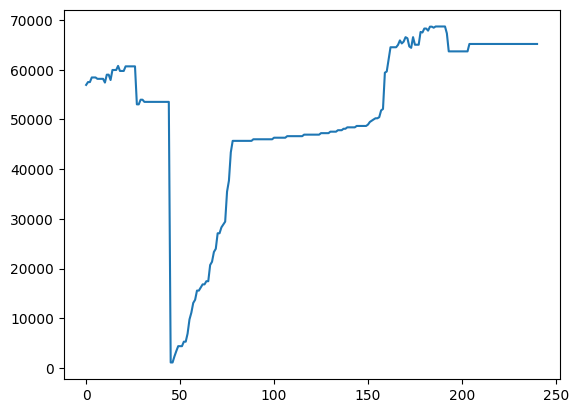

In [ ]:
plt.plot(poll[4600:])

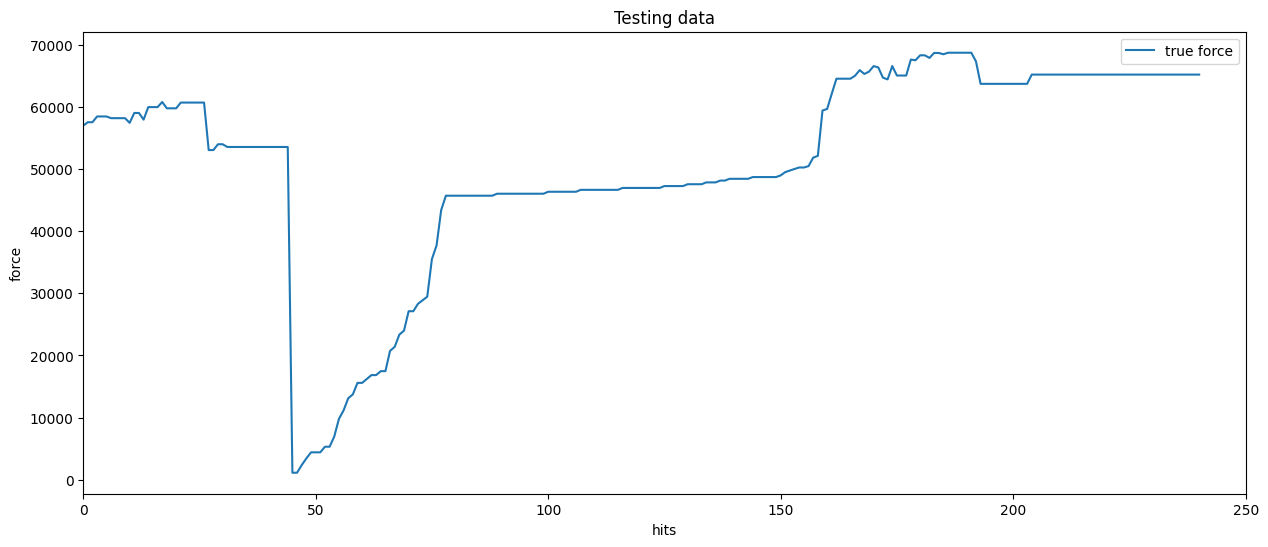

In [ ]:
plt.figure(figsize=(15,6))
plt.xlim([0,250])
plt.ylabel("force")
plt.xlabel("hits")
plt.plot( poll[4600:],label='true force')
#plt.plot(num_list, testPredict,label='predicted force')
plt.title("Testing data")
plt.legend(loc='best')
plt.show()

In [ ]:
y_test_true1=y_test_true.reshape(-1, 1)
testPredict1=testPredict.reshape(-1, 1)
inversed_y_test_true = scaler.inverse_transform(y_test_true1)
inversed_testPredict = scaler.inverse_transform(testPredict1)

ValueError: non-broadcastable output operand with shape (240,1) doesn't match the broadcast shape (240,7)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 0.05297705


In [ ]:
model2 = Sequential()
model2.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2])))
model2.add(Dense(64))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Dense(1))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 256)               270336    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 287105 (1.10 MB)
Trainable params: 286977 (1.09 MB)
Non-trainable params: 128 (512.00 Byte)
______________

In [ ]:
model2.compile(loss='mse', optimizer='adam')

hist2 = model2.fit(train_X, train_y, epochs=100, batch_size=128, validation_data=(test_X, test_y))

Epoch 1/100
36/36 [==============================] - 4s 30ms/step - loss: 0.2494 - val_loss: 0.1887
Epoch 2/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0278 - val_loss: 0.0613
Epoch 3/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0042 - val_loss: 0.0581
Epoch 4/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0042 - val_loss: 0.0606
Epoch 5/100
36/36 [==============================] - 1s 14ms/step - loss: 0.0054 - val_loss: 0.0568
Epoch 6/100
36/36 [==============================] - 1s 16ms/step - loss: 0.0033 - val_loss: 0.0528
Epoch 7/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0022 - val_loss: 0.0531
Epoch 8/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 0.0503
Epoch 9/100
36/36 [==============================] - 1s 16ms/step - loss: 0.0016 - val_loss: 0.0464
Epoch 10/100
36/36 [==============================] - 1s 16ms/step - loss: 0.0014 - val_loss: 0.0456

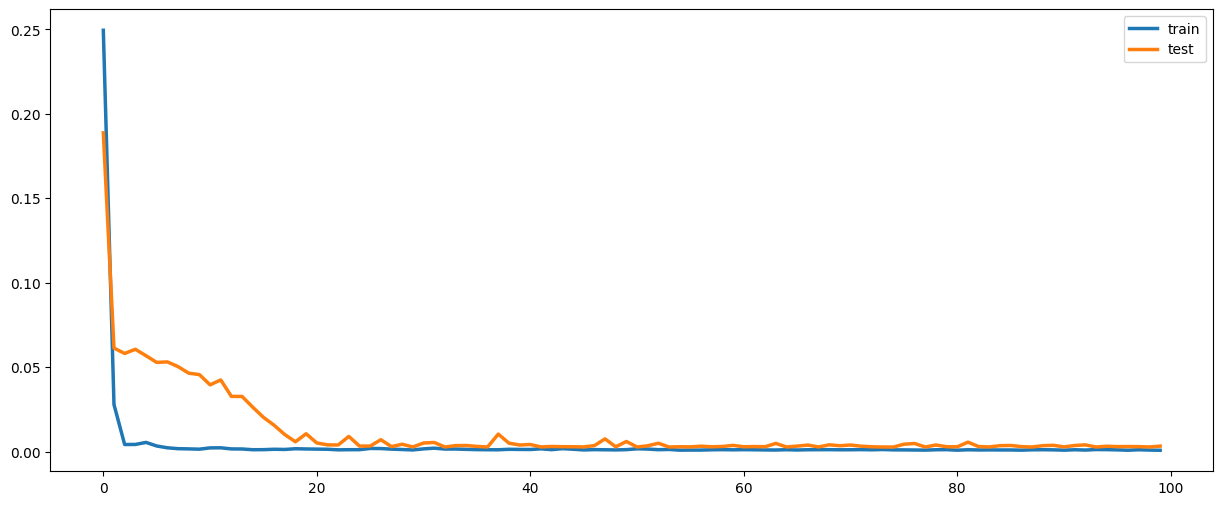

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(hist2.history['loss'], label='train', linewidth = 2.5)
plt.plot(hist2.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [ ]:
y_test_true = test[:,7]

In [ ]:
testPredict2 = model2.predict(test_X)
testPredict2 = testPredict2.ravel()

# Inverse scaling the output, for better visual interpretation

poll = np.array(df1["Force"])
meanop = poll.mean()
stdop = poll.std()

print(meanop, stdop)

y_test_true = y_test_true*stdop + meanop
testPredict2 = testPredict2*stdop + meanop

8/8 [==============================] - 0s 4ms/step
44300.23736866846 12918.556931322879


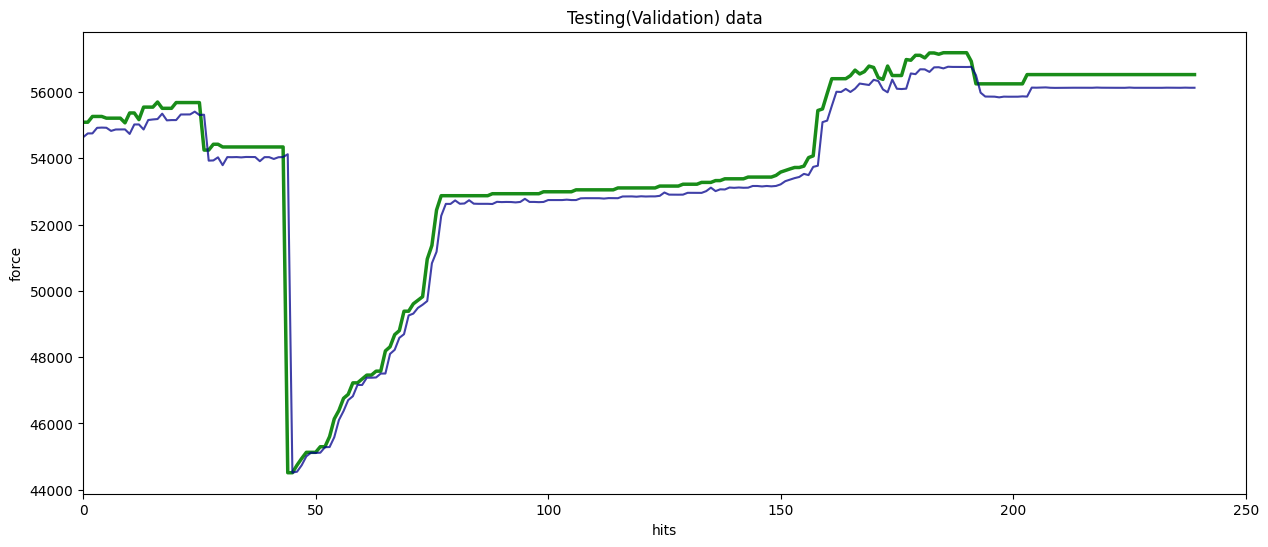

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([0,250])
plt.ylabel("force")
plt.xlabel("hits")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict2, c = "darkblue", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

# **Training on the complete training dataset and testing on the test dataset given**

In [ ]:
values.shape

(4840, 8)

In [ ]:
values

array([[4.4726918e-04, 1.0033616e-02, 1.9097145e-06, ..., 1.0561378e-03,
        0.0000000e+00, 0.0000000e+00],
       [5.2364205e-04, 3.1610519e-02, 7.3129277e-06, ..., 1.7060688e-03,
        0.0000000e+00, 0.0000000e+00],
       [1.1804487e-03, 4.2922057e-02, 1.5682243e-05, ..., 6.8242750e-03,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.9425415e-02, 1.8072145e-03, 3.2373333e-05, ..., 5.8493786e-03,
        9.4653928e-01, 9.4653928e-01],
       [3.4492265e-04, 9.7274868e-05, 9.8948448e-08, ..., 8.1241371e-05,
        9.4653928e-01, 9.4653928e-01],
       [5.6598666e-03, 8.8787155e-04, 2.9263242e-06, ..., 2.8434480e-03,
        9.4653928e-01, 9.4653928e-01]], dtype=float32)

In [ ]:
train_x, train_y = values[:, :-1], values[:, -1]
print(train_x.shape, train_y.shape)

(4840, 7) (4840,)


In [ ]:
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))

In [ ]:
model3 = Sequential()
model3.add(LSTM(256, input_shape=(train_x.shape[1], train_x.shape[2])))
model3.add(Dense(32))
model3.add(Dropout(0.25))
model3.add(BatchNormalization())
model3.add(Dense(1))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 256)               270336    
                                                                 
 dense_8 (Dense)             (None, 32)                8224      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 278721 (1.06 MB)
Trainable params: 278657 (1.06 MB)
Non-trainable params: 64 (256.00 Byte)
_______________

In [ ]:
model3.compile(loss='mse', optimizer='adam')

hist3 = model3.fit(train_x, train_y, epochs=200, batch_size=256, validation_split=0.2)

Epoch 1/200
16/16 [==============================] - 4s 59ms/step - loss: 0.3220 - val_loss: 0.5067
Epoch 2/200
16/16 [==============================] - 0s 22ms/step - loss: 0.1802 - val_loss: 0.3445
Epoch 3/200
16/16 [==============================] - 0s 24ms/step - loss: 0.0839 - val_loss: 0.2201
Epoch 4/200
16/16 [==============================] - 0s 25ms/step - loss: 0.0284 - val_loss: 0.1373
Epoch 5/200
16/16 [==============================] - 0s 25ms/step - loss: 0.0064 - val_loss: 0.0994
Epoch 6/200
16/16 [==============================] - 0s 25ms/step - loss: 0.0037 - val_loss: 0.0869
Epoch 7/200
16/16 [==============================] - 0s 25ms/step - loss: 0.0029 - val_loss: 0.0836
Epoch 8/200
16/16 [==============================] - 0s 25ms/step - loss: 0.0020 - val_loss: 0.0893
Epoch 9/200
16/16 [==============================] - 0s 25ms/step - loss: 0.0016 - val_loss: 0.0880
Epoch 10/200
16/16 [==============================] - 0s 23ms/step - loss: 9.5647e-04 - val_loss: 0.

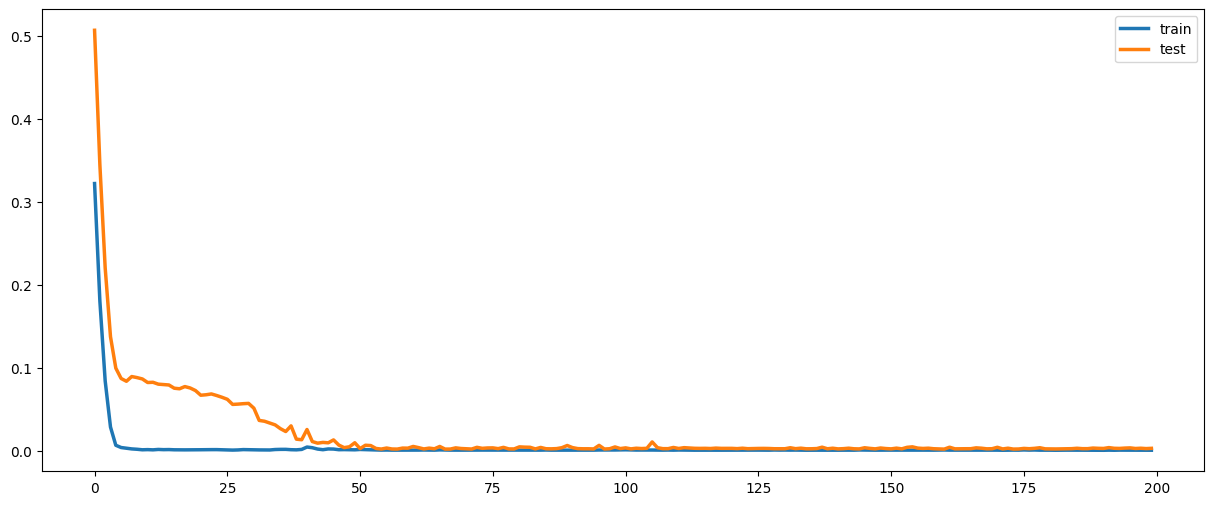

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(hist3.history['loss'], label='train', linewidth = 2.5)
plt.plot(hist3.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

save and load the model

In [ ]:
model.save('path/to/location.keras')

In [ ]:
model = keras.models.load_model('path/to/location.keras')

prepare the data foe inference

In [ ]:
y_train_true = values[:,7]

In [ ]:
trainPredict3 = model3.predict(train_x)
trainPredict3 = trainPredict3.ravel()

# Inverse scaling the output, for better visual interpretation

poll = np.array(df1["Force"])
meanop = poll.mean()
stdop = poll.std()

print(meanop, stdop)

y_train_true = y_train_true*stdop + meanop
trainPredict3 = trainPredict3*stdop + meanop

152/152 [==============================] - 1s 4ms/step
44300.23736866846 12918.556931322879


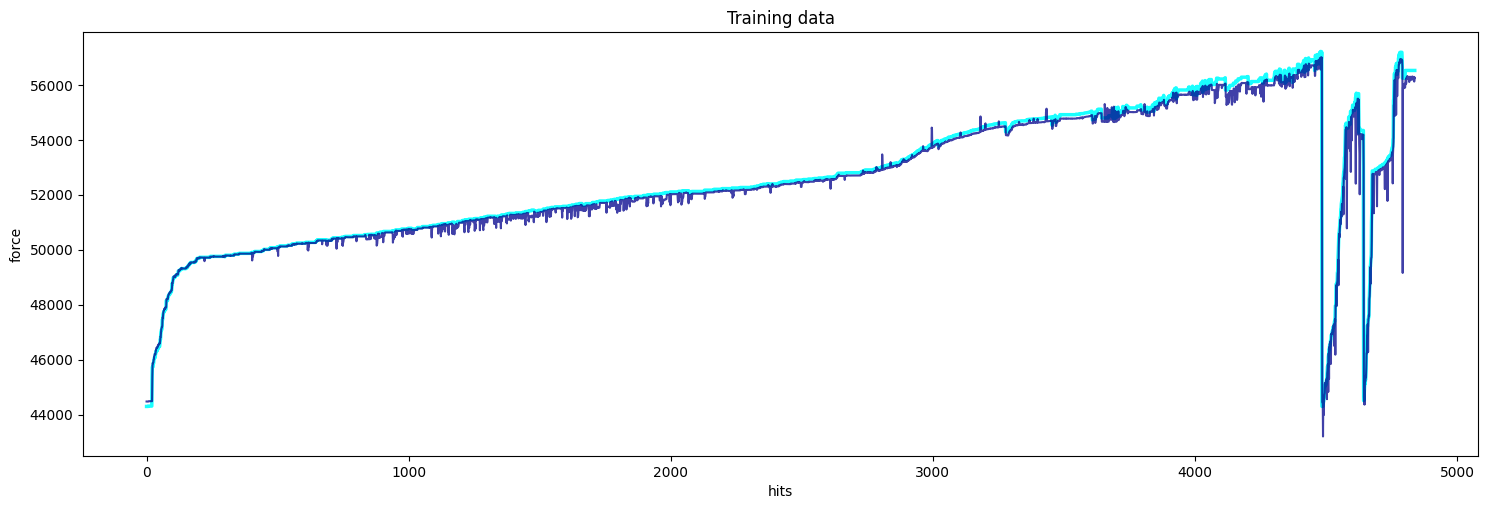

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18,5.5))
# plt.xlim([1000,1250])
plt.ylabel("force")
plt.xlabel("hits")
plt.plot(y_train_true, c = "cyan", alpha = 0.90, linewidth = 2.5)
plt.plot(trainPredict3, c = "darkblue", alpha = 0.75)
plt.title("Training data")
plt.show()


# **creating training dataset: random sampling + random noise **

In [ ]:
arr=df1.to_numpy()

In [ ]:
a = np.empty([4000, 8,500])

In [ ]:
for i in range (4000):
    num_iters = 196
    rand_curve = arr
    noise  = np.random.normal(0, 0.02, num_iters)
    signal = rand_curve + noise
    noisy_curve = signal[signal > 0]
    # Generate some random data
    y = noisy_curve
    x = np.arange(y.size)

    # Interpolate the data using a cubic spline to "new_length" samples
    new_length = 500
    new_x = np.linspace(x.min(), x.max(), new_length)
    new_y = sp.interpolate.interp1d(x, y, kind='cubic')(new_x)
    for j in range(101):
      a[i][j]=new_y[j]

# Testing

In [ ]:
values = df1.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
a = np.empty([4000, 7,500])

In [ ]:
scaled.shape

(196, 7)

In [ ]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt

In [ ]:
for i in range (4000):
    num_iters = 196
    for k in range (7):

      rand_curve = scaled[:,k]
      noise  = np.random.normal(0, 0.02, num_iters)
      signal = rand_curve + noise
      noisy_curve = signal[signal > 0]
      # Generate some random data
      y = noisy_curve
      x = np.arange(y.size)

      # Interpolate the data using a cubic spline to "new_length" samples
      new_length = 500
      new_x = np.linspace(x.min(), x.max(), new_length)
      new_y = sp.interpolate.interp1d(x, y, kind='cubic')(new_x)
      for j in range(500):
        a[i][k][j]=new_y[j]

In [ ]:
a.shape

(4000, 7, 500)

In [ ]:
a

array([[[ 1.38662993e-03,  1.89632843e-02,  2.92413890e-02, ...,
          6.28990605e-02,  5.45564271e-02,  3.28181093e-02],
        [ 3.23380733e-02,  1.25938032e-01,  1.53596259e-01, ...,
          2.81003325e-02,  2.75153568e-02,  1.88886184e-02],
        [ 1.32842732e-02,  2.22530146e-02,  2.62825374e-02, ...,
          5.44132075e-03,  9.78148611e-03,  1.67728516e-02],
        ...,
        [ 1.91343246e-02,  2.75881142e-02,  3.21638426e-02, ...,
          1.57315521e-02,  1.80190824e-02,  2.56945356e-02],
        [ 2.37456715e-03,  1.51423379e-01,  1.66655890e-01, ...,
          4.81260838e-02,  5.88444095e-02,  5.45444339e-02],
        [ 1.43317570e-02,  7.91399047e-03,  1.35309352e-02, ...,
          9.54700810e-01,  9.48737448e-01,  9.36511428e-01]],

       [[ 1.15117052e-02,  9.25574377e-03,  7.90865165e-03, ...,
          2.90561207e-02,  3.19724200e-02,  3.34323612e-02],
        [ 6.31812079e-02,  1.38088381e-01,  1.54104783e-01, ...,
          8.47028788e-03,  1.46558711e

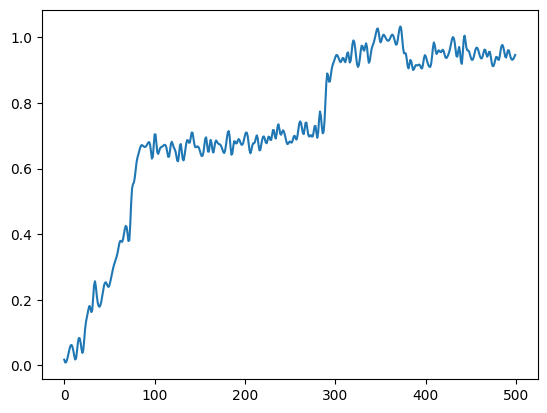

In [ ]:
plt.plot(a[1900][6])

In [ ]:
b=a.reshape([7,2000000])

In [ ]:
b.shape

(7, 2000000)

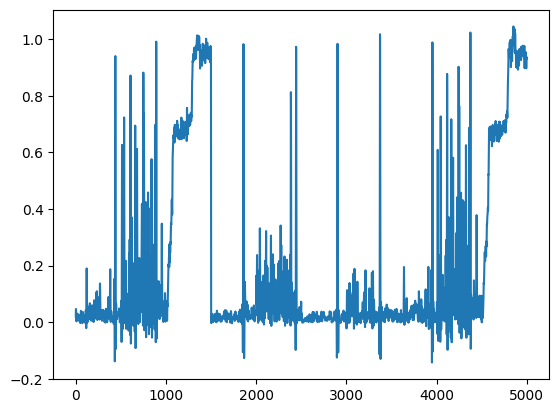

In [ ]:
plt.plot(b[6][:5000])

In [ ]:
b = np.empty([7,2000000])

In [ ]:
for i in range (7):
  for j in range(4000):
    for k in range (500):
      b[i][j]=a[j][i][k]

In [ ]:
b.shape

(7, 2000000)

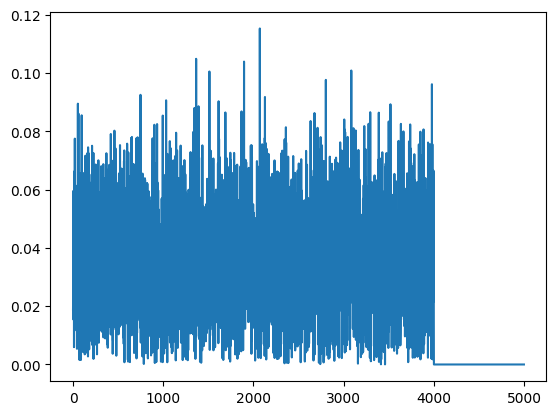

In [ ]:
plt.plot(b[1][:5000])

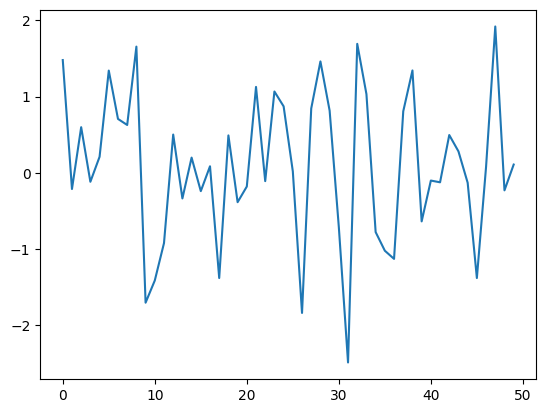

# **rowan dataset for multivaiate: trarget-> forve, features-> AE**

In [ ]:
import pandas as pd

In [ ]:
df1= pd.read_csv('/content/test2_all_synchro_AE (2).csv')

In [ ]:
df1

In [ ]:
df2= pd.read_csv('/content/test3_all_synchro_AE (1).csv')

In [ ]:
df2

In [ ]:
df3= pd.read_csv('/content/amsy6_dogbone_rowan.csv')

In [ ]:
df3

,Unnamed: 0,time,channel,param_id,amplitude,duration,energy,rms,threshold,rise_time,...,cascade_hits,cascade_counts,cascade_energy,cascade_signal_strength,amplitudeDB,CumulativeE,CumulativeC,mahala_cum_norm,mahala,mahala_cum
0,0,16.566864,2,3,0.000146,0.001052,176.758775,0.000004,0.0001,0.000709,...,3,30,421.753538,80.967104,43.295226,1.767588e+02,13,0.000105,2.839774,2.839774
1,1,16.566914,1,2,0.000154,0.003315,670.700760,0.000007,0.0001,0.001977,...,1,21,670.700760,132.402890,43.736228,8.474595e+02,34,0.000219,3.121787,5.961561
2,2,16.693152,1,2,0.000219,0.004501,1435.793019,0.000006,0.0001,0.001675,...,3,132,3185.006249,571.641277,46.817051,2.283253e+03,118,0.000329,2.990573,8.952134
3,3,16.693341,2,3,0.000187,0.003811,1043.874292,0.000006,0.0001,0.001347,...,17,119,1933.640191,358.109010,45.447903,3.327127e+03,212,0.000431,2.758419,11.710553
4,4,16.838890,1,2,0.000151,0.001582,335.665809,0.000006,0.0001,0.000923,...,1,10,335.665809,72.106004,43.562505,3.662793e+03,222,0.000533,2.778009,14.488561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525,4525,1558.804585,1,2,0.000207,0.000144,52.989156,0.000006,0.0001,0.000057,...,1,10,52.989156,11.217870,46.320579,5.509669e+08,2680721,0.999622,2.351440,27163.720232
4526,4526,1558.964767,1,2,0.000761,0.000154,401.922369,0.000004,0.0001,0.000059,...,1,34,401.922369,27.652539,57.629201,5.509673e+08,2680755,0.999715,2.527604,27166.247837
4527,4527,1559.181190,1,2,0.000170,0.000028,25.940932,0.000004,0.0001,0.000011,...,1,9,25.940932,7.484364,44.634161,5.509673e+08,2680764,0.999813,2.658853,27168.906690
4528,4528,1559.242351,1,2,0.000338,0.000098,69.679843,0.000005,0.0001,0.000020,...,1,15,69.679843,11.157284,50.576860,5.509674e+08,2680779,0.999906,2.532921,27171.439611


In [ ]:
df4= pd.read_csv('/content/Al_Sample1.csv')

In [ ]:
df4

,Time,Force,Stroke,Eng. Stress,Eng. Strain
0,0.00,1.366933,0.000594,0.006243,0.000004
1,0.20,1.366933,0.003969,0.006243,0.000027
2,0.40,2.861023,0.007313,0.013066,0.000049
3,0.60,21.409990,0.010650,0.097780,0.000071
4,0.80,46.316780,0.013981,0.211531,0.000093
...,...,...,...,...,...
7685,1537.00,19656.230000,25.617310,89.770871,0.170782
7686,1537.20,19709.090000,25.620650,90.012285,0.170804
7687,1537.40,19757.650000,25.623980,90.234061,0.170827
7688,1537.60,19808.450000,25.627310,90.466067,0.170849


In [ ]:
c10=[]
for i in range (4530):
  t= int(df3['time'].values[i])-16
  for j in range (7690):
      if t==df4['Time'][j]:
           c10.append(df4['Force'][j])

In [ ]:
len(c10)

4486

In [ ]:
df10=df1[['amplitude','duration','energy','rms','rise_time','counts','Force']]

In [ ]:
df11=df2[['amplitude','duration','energy','rms','rise_time','counts','Force']]

In [ ]:
df4=df3[:4486]

In [ ]:
df4['Force']=c10

<ipython-input-13-1a8c57004a60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Force']=c10


In [ ]:
df4

,Unnamed: 0,time,channel,param_id,amplitude,duration,energy,rms,threshold,rise_time,...,cascade_counts,cascade_energy,cascade_signal_strength,amplitudeDB,CumulativeE,CumulativeC,mahala_cum_norm,mahala,mahala_cum,Force
0,0,16.566864,2,3,0.000146,0.001052,176.758775,0.000004,0.0001,0.000709,...,30,421.753538,80.967104,43.295226,1.767588e+02,13,0.000105,2.839774,2.839774,1.366933
1,1,16.566914,1,2,0.000154,0.003315,670.700760,0.000007,0.0001,0.001977,...,21,670.700760,132.402890,43.736228,8.474595e+02,34,0.000219,3.121787,5.961561,1.366933
2,2,16.693152,1,2,0.000219,0.004501,1435.793019,0.000006,0.0001,0.001675,...,132,3185.006249,571.641277,46.817051,2.283253e+03,118,0.000329,2.990573,8.952134,1.366933
3,3,16.693341,2,3,0.000187,0.003811,1043.874292,0.000006,0.0001,0.001347,...,119,1933.640191,358.109010,45.447903,3.327127e+03,212,0.000431,2.758419,11.710553,1.366933
4,4,16.838890,1,2,0.000151,0.001582,335.665809,0.000006,0.0001,0.000923,...,10,335.665809,72.106004,43.562505,3.662793e+03,222,0.000533,2.778009,14.488561,1.366933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,4481,1521.274915,1,2,0.000429,0.001989,1995.751863,0.000004,0.0001,0.000107,...,44,1995.751863,171.414261,52.654783,5.061541e+08,2676636,0.968129,2.927523,26307.940273,68870.640000
4482,4482,1521.274940,2,3,0.000172,0.000364,257.103151,0.000004,0.0001,0.000098,...,6,257.103151,32.462285,44.711370,5.061544e+08,2676642,0.968231,2.773181,26310.713455,68870.640000
4483,4483,1529.717260,1,2,0.000793,0.003455,6109.111498,0.000004,0.0001,0.000208,...,105,6109.111498,335.387693,57.986555,5.061605e+08,2676747,0.968339,2.935380,26313.648834,67513.950000
4484,4484,1529.717314,2,3,0.000221,0.000291,211.674287,0.000004,0.0001,0.000066,...,3,211.674287,25.282069,46.877161,5.061607e+08,2676750,0.968441,2.767331,26316.416165,67513.950000


In [ ]:
df4.to_csv('A3.csv')

In [ ]:
df13=df4[['amplitude','duration','energy','rms','rise_time','counts','Force']]

In [ ]:
df_final=df10

In [ ]:
df_final

,amplitude,duration,energy,rms,rise_time,counts,Force
0,0.000233,2.718000e-04,112.955078,0.000064,2.700000e-06,18,1127.513
1,0.000106,9.000000e-07,23.840845,0.000515,1.000000e-07,1,1127.513
2,0.000202,8.656000e-04,226.100244,0.000051,2.010000e-05,43,2352.635
3,0.000105,1.000000e-07,14.967017,0.001223,1.000000e-07,1,3427.315
4,0.000186,5.585000e-04,151.914893,0.000052,1.190000e-05,24,4408.630
...,...,...,...,...,...,...,...
191,0.000108,1.280000e-05,8.460547,0.000081,9.000000e-07,1,65188.840
192,0.002037,1.896000e-04,2961.631372,0.000395,5.610000e-05,72,65188.840
193,0.000136,1.030000e-05,11.225146,0.000104,1.010000e-05,1,65188.840
194,0.000666,9.320000e-05,269.693506,0.000170,1.110000e-05,35,65188.840


In [ ]:
df_final=pd.concat([df13, df11, df10],ignore_index=True)

In [ ]:
df_final

,amplitude,duration,energy,rms,rise_time,counts,Force
0,0.000233,2.718000e-04,112.955078,0.000064,2.700000e-06,18,1127.513
1,0.000106,9.000000e-07,23.840845,0.000515,1.000000e-07,1,1127.513
2,0.000202,8.656000e-04,226.100244,0.000051,2.010000e-05,43,2352.635
3,0.000105,1.000000e-07,14.967017,0.001223,1.000000e-07,1,3427.315
4,0.000186,5.585000e-04,151.914893,0.000052,1.190000e-05,24,4408.630
...,...,...,...,...,...,...,...
4836,0.000429,1.988600e-03,1995.751863,0.000004,1.069000e-04,44,68870.640
4837,0.000172,3.640000e-04,257.103151,0.000004,9.830000e-05,6,68870.640
4838,0.000793,3.454600e-03,6109.111498,0.000004,2.080000e-04,105,67513.950
4839,0.000221,2.910000e-04,211.674287,0.000004,6.630000e-05,3,67513.950


<Axes: >

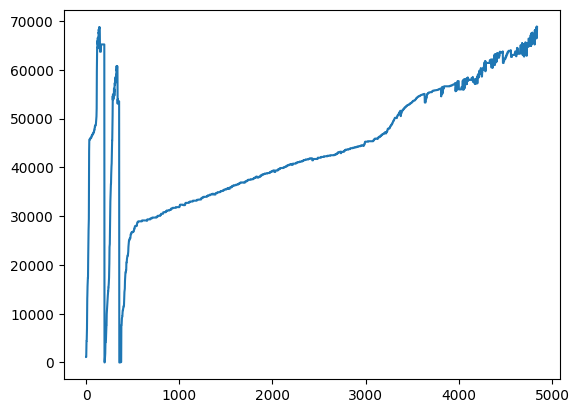

In [ ]:
df_final['Force'].plot()

In [ ]:
df_final.to_csv('multivariate.csv')